Import dependences
---

In [0]:
import math 
import datetime
#matrix math & data pre-processisng
import numpy as np

#for data and formatting 
import pandas as pd

#for plotting
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set()

#for ML
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [0]:
!pip install yfinance --upgrade --no-cache-dir


  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=6f08c0de1123df6571f36727783e600e49c3c4ebc88e87461d0954c1b0adff1c
  Stored in directory: /tmp/pip-ephem-wheel-cache-c6guffll/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [0]:
from google.colab import drive
drive.mount('drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


Import dataset
---

In [115]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

yf.pdr_override()
df = pdr.get_data_yahoo('GOOGL', start="2012-01-01").reset_index()
df.to_csv('Googl.csv', index=False)
df.set_index('Date', inplace=True)
df.tail()
print(len(df))

[*********************100%***********************]  1 of 1 downloaded
1932


Calculate Moving Average of 100 and of 30 days


In [0]:
closing_price = df['Adj Close']
ma100 = closing_price.rolling(window=100).mean()
ma30 = closing_price.rolling(window=30).mean()

plot data set to visualize stock movement
---
includes MA100 and MA20

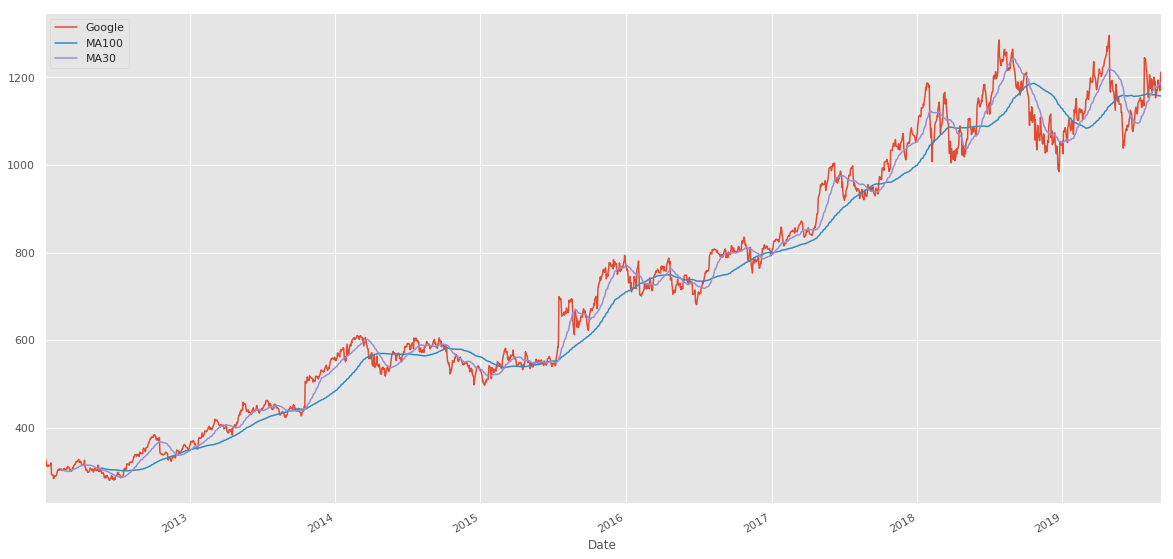

In [19]:
import matplotlib as mpl
mpl.__version__
#ajust style of matplotlib
style.use('ggplot')

closing_price.plot(label='Google', figsize=(20,10))
ma100.plot(label = 'MA100')
ma30.plot(label = 'MA30')

plt.legend()


Predicting Stock prices
---

In [93]:
dfreg = df.loc[:,['Adj Close','Volume', 'High', 'Low']]
dfreg['HL_PCT'] = (df['High']- df['Low'])/df['Close']*100
dfreg['PCT_change'] = (df['Close']-df['Open'])/df['Open']*100
dfreg.tail()

Adj Close   Volume  ...    HL_PCT  PCT_change
Date                              ...                      
2019-08-29  1194.239990   981800  ...  1.164750    0.659121
2019-08-30  1190.530029   903200  ...  1.228865   -0.818090
2019-09-03  1169.550049  1295400  ...  2.169210   -1.040735
2019-09-04  1182.270020  1065600  ...  1.129182    0.239100
2019-09-05  1212.189941  1319700  ...  1.757980    1.552361

[5 rows x 6 columns]

Split Data into Training and Testing data
---

In [42]:
window = 32 # amount of days in past on which to base prediction on for next day

num_samples = len(df) - window # indicates the amount of samples the dataset can create. 
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window +1).astype(np.int)

print ("We have created %s samples, each with %s columns "%((len(indices)+1),(window + 1)))

We have created 1900 samples, each with 33 columns 


In [41]:
data = df['Adj Close'].values[indices] #for a 1 dimensional matrix of training samples
print ("the following shows a 2d matrix of training samples")
print (data[1])

the following shows a 2d matrix of training samples
[334.474487 329.834839 325.335327 311.541534 311.881897 313.293304
 315.135132 312.8078   314.604614 316.771759 320.105103 293.2883
 293.05304  290.755768 285.030029 284.33432  290.280273 289.134125
 290.345337 290.705719 292.847839 298.46347  304.849854 303.68869
 305.230225 306.036041 303.25827  306.406403 305.185181 303.083069
 303.563568 302.62262  307.307312]


For each or the samples of 33 columns, the first 32 will be used as training samples. the final column will be the target variable. 



In [134]:
rX = data[:,:-1]
ry = data[:,-1]
print ("For an array of 33 long the following 32 values")
print (x[1])
print ("whould predict the following value")
print (y[1])

For an array of 33 long the following 32 values
[334.474487 329.834839 325.335327 311.541534 311.881897 313.293304
 315.135132 312.8078   314.604614 316.771759 320.105103 293.2883
 293.05304  290.755768 285.030029 284.33432  290.280273 289.134125
 290.345337 290.705719 292.847839 298.46347  304.849854 303.68869
 305.230225 306.036041 303.25827  306.406403 305.185181 303.083069
 303.563568 302.62262 ]
whould predict the following value
292.847839


Take 80% of the data for training. the left over 20% will be used for testing the accuracy of any predictive model. 

In [0]:
# Split the Training data from th Testing data
split_percentage = 0.8
ind_split = int(split_percentage * num_samples)
rX_train = rX[:ind_split]
rX_test = rX[ind_split:]
ry_train = ry[:ind_split]

ry_test = ry[ind_split:]

In [0]:
# alt trainsplit
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
dfreg.dropna(inplace=True) # now the previously deleted values will be filled again

# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))


# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Predictive models
---



Linear Regression & Quadratic Discriminant Analysis & KNN
--

In [98]:
#Linean Regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train,y_train)

# Polynomial disciminate analysis 2
clfpoly2 = make_pipeline(PolynomialFeatures(2),Ridge())
clfpoly2.fit(X_train, y_train)

# Polynomial disciminate analysis 3
clfpoly3 = make_pipeline(PolynomialFeatures(3),Ridge())
clfpoly3.fit(X_train, y_train)

#KNN regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [99]:
conf_linreg = clfreg.score(X_test,y_test)
conf_poly2 = clfpoly2.score(X_test,y_test)
conf_poly3 = clfpoly3.score(X_test,y_test)
conf_knn = clfknn.score(X_test,y_test)

print ('The linear regression confidence is ', conf_linreg)
print ('The quadratic regression 2 confidence is ', conf_poly2)
print ('The quadratic regression 3 confidence is ', conf_poly3)
print ('The knn regression confidence is ', conf_knn)

The linear regression confidence is  0.9770253046591059
The quadratic regression 2 confidence is  0.9780202784212204
The quadratic regression 3 confidence is  0.9778002911922061
The knn regression confidence is  0.9689142815115027


In [101]:
forecast_set_lr = clfreg.predict(X_lately)
forecast_set_poly2 = clfpoly2.predict(X_lately)
forecast_set_poly3 = clfpoly3.predict(X_lately)
forecast_set_knn = clfknn.predict(X_lately)

dfreg['Forecast'] = np.nan

print (forecast_set_lr)


[1197.93527778 1199.10933435 1182.01247658 1199.48455852 1175.1368426
 1174.3590849  1182.30049446 1206.86393368 1194.49657684 1199.61763411
 1194.31168005 1177.01205048 1170.68761517 1178.69167764 1177.32145733
 1198.93312393 1196.88087432 1181.10317972 1183.35186893 1211.00372511]


Ridge Regression
---


In [0]:
ridge_model = Ridge()
ridge_model.fit(rX_train,ry_train)

y_pred_train_ridge = ridge_model.predict(rX_train)
y_pred_ridge = ridge_model.predict(rX_test)


#Results
---

Plotting predictions based on past to compare with future results
---

Linear regression
--

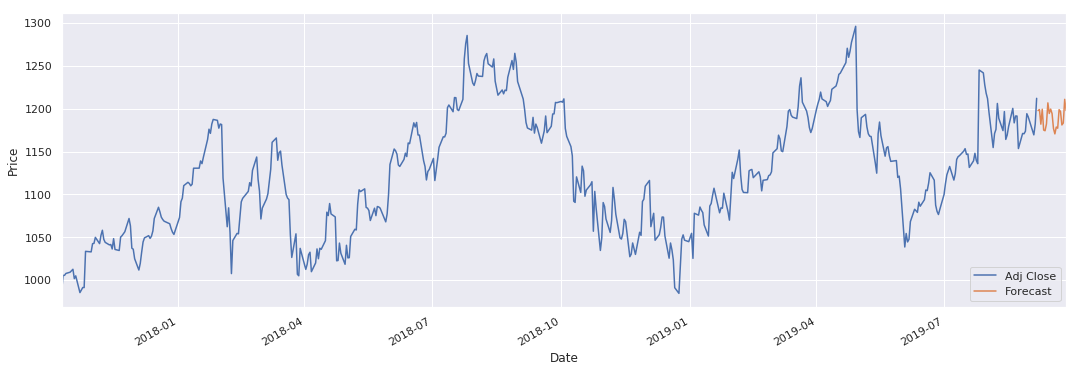

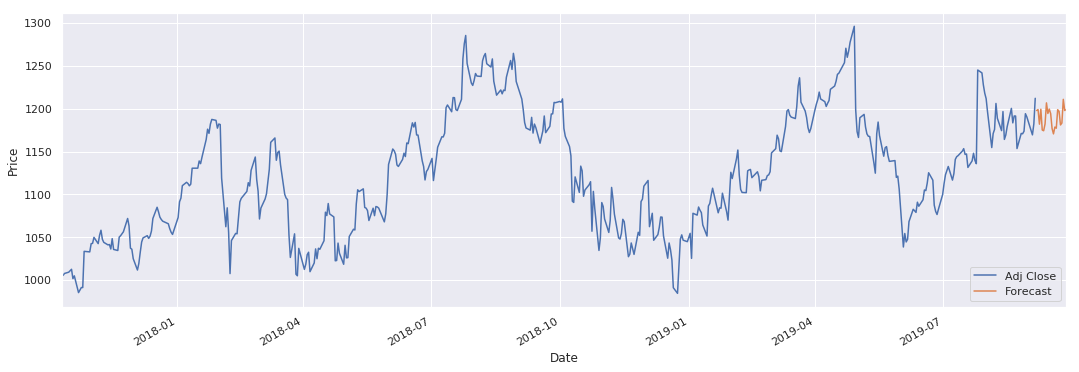

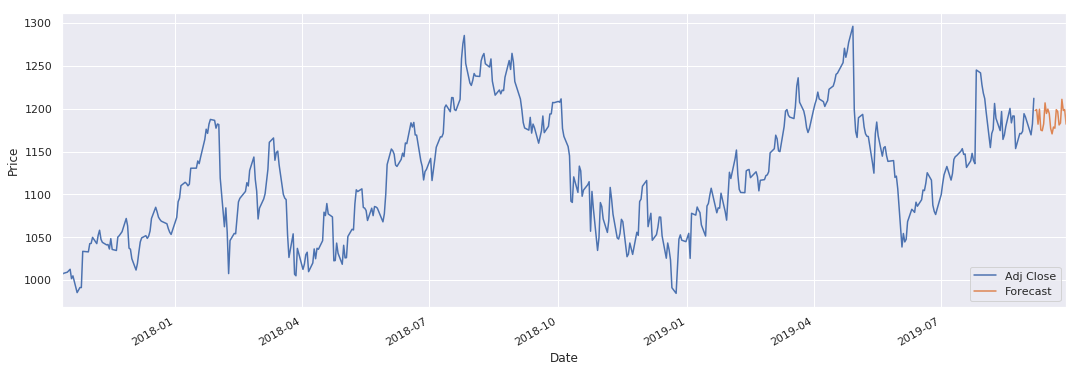

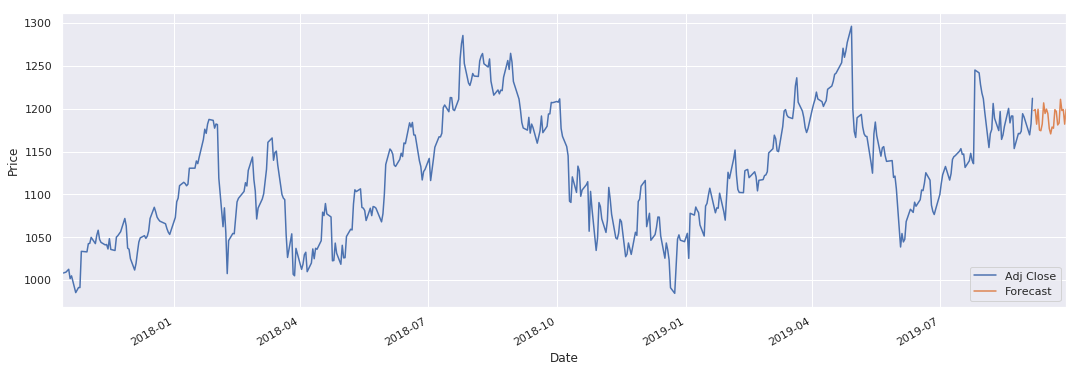

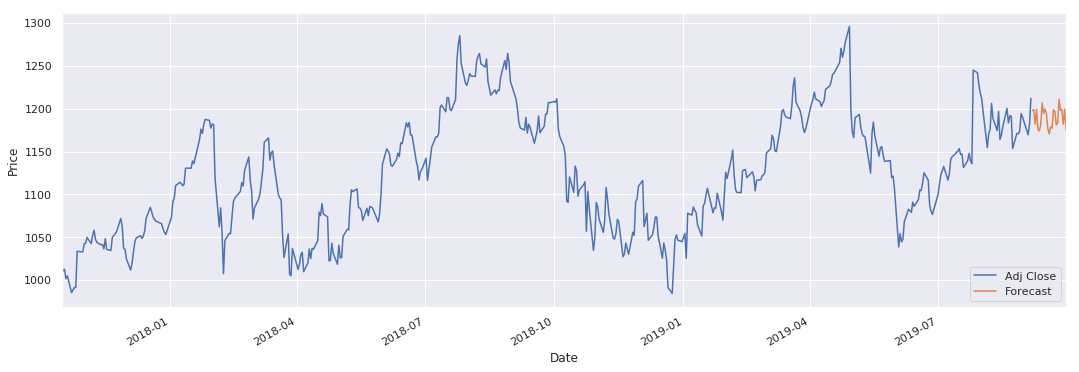

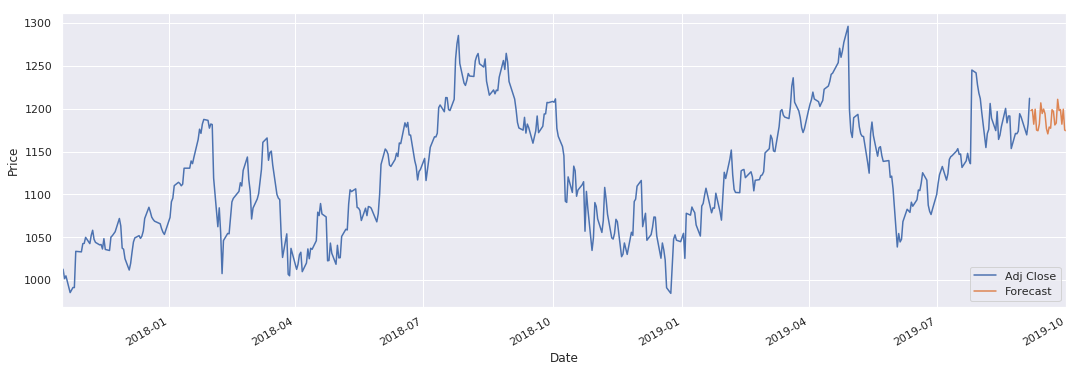

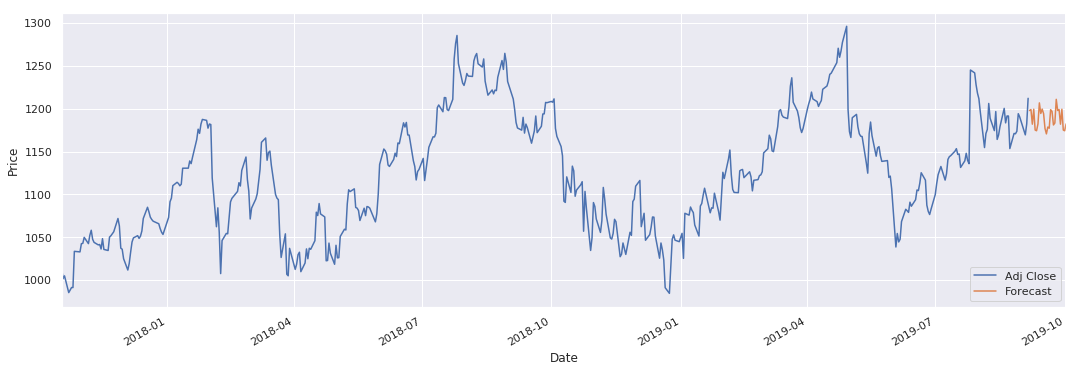

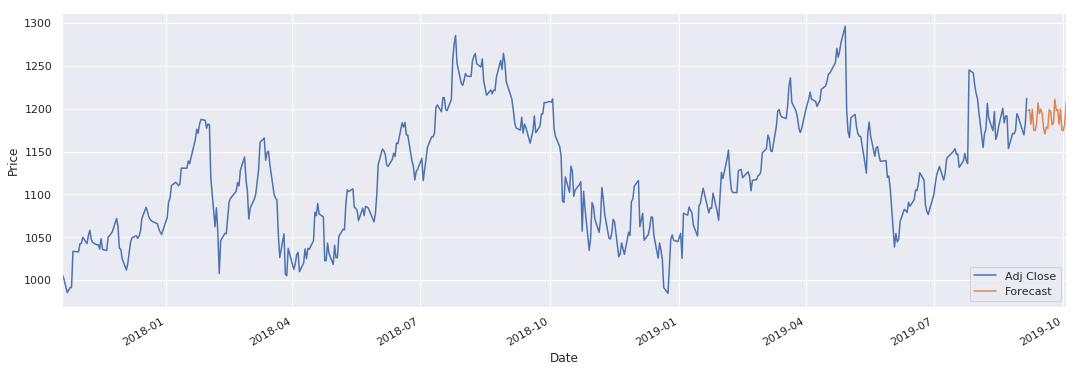

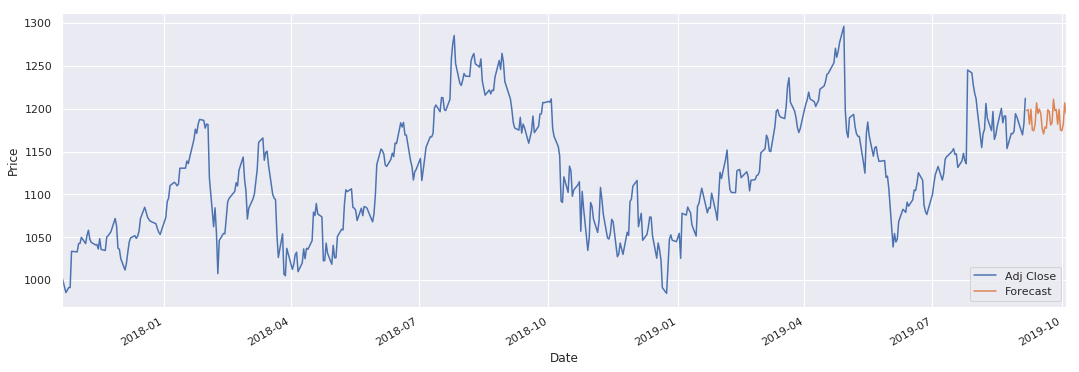

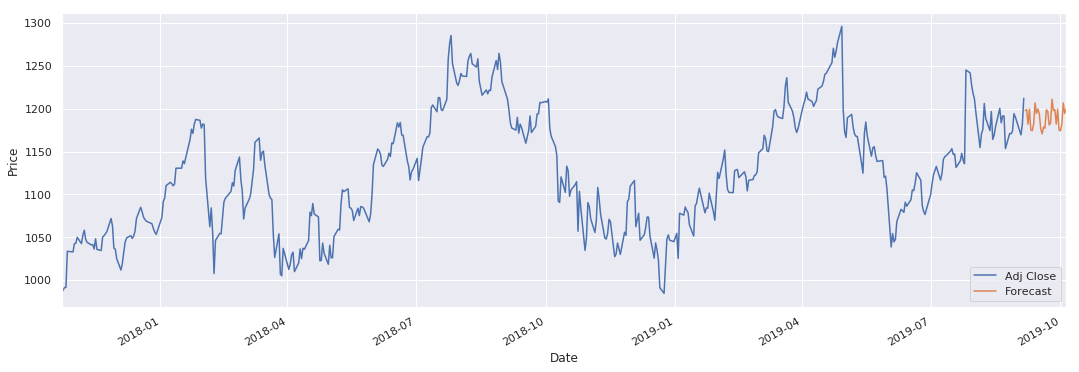

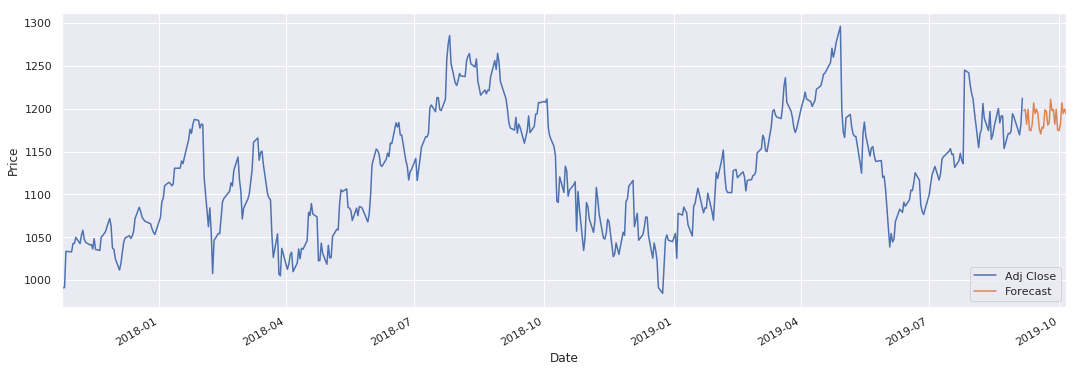

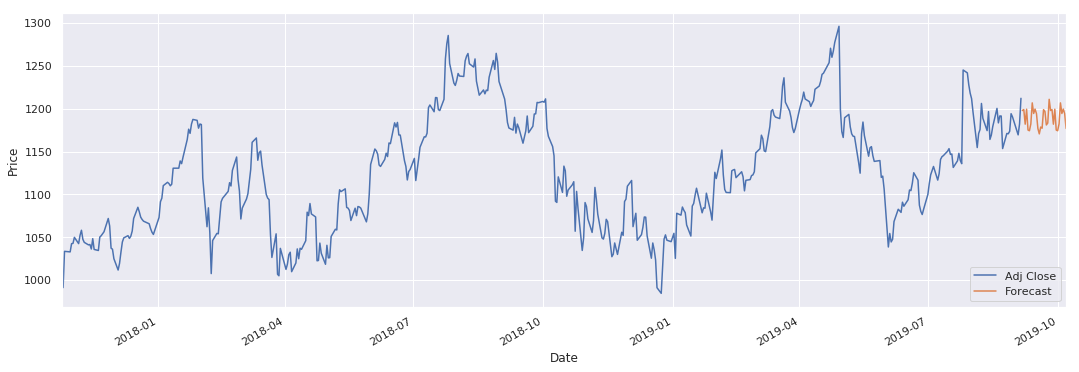

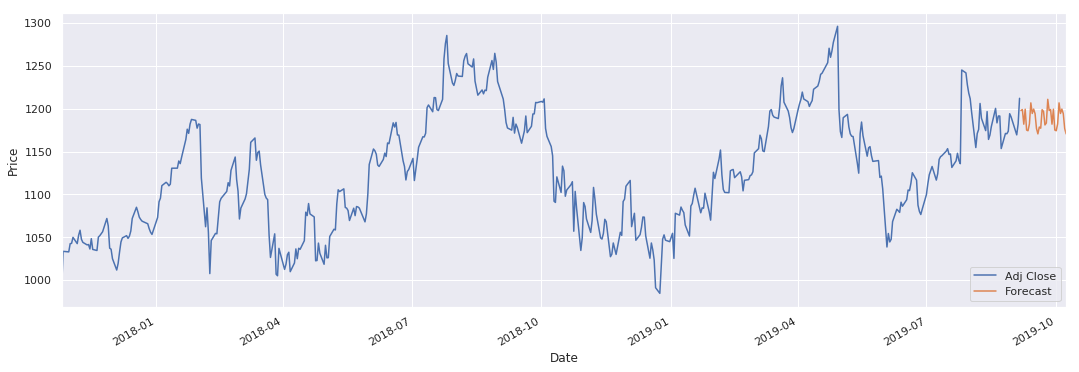

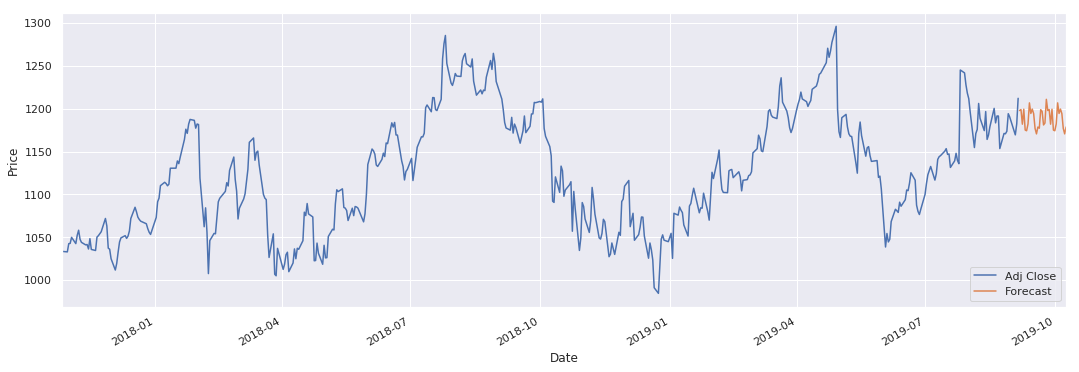

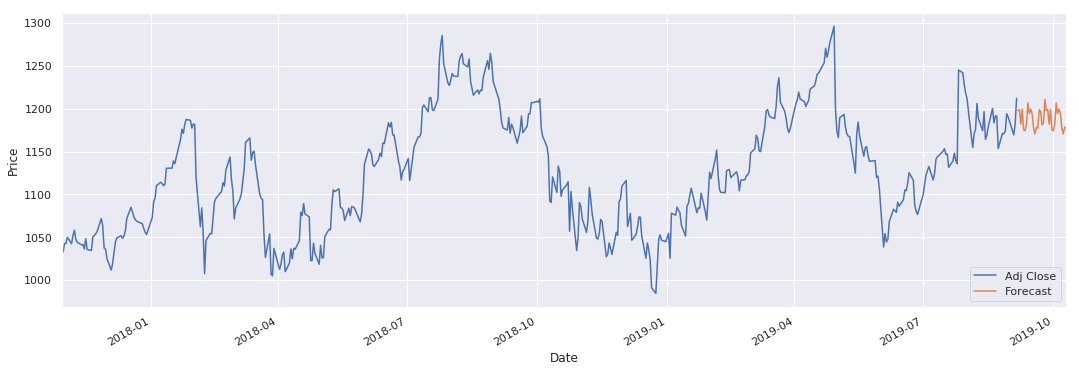

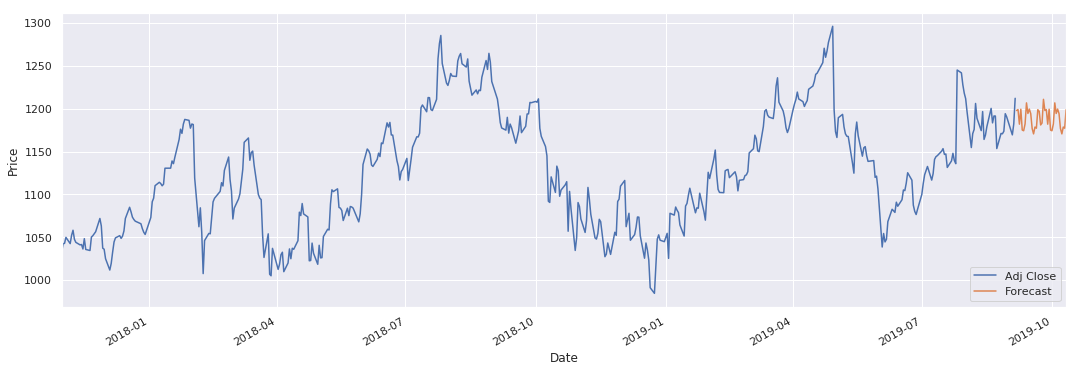

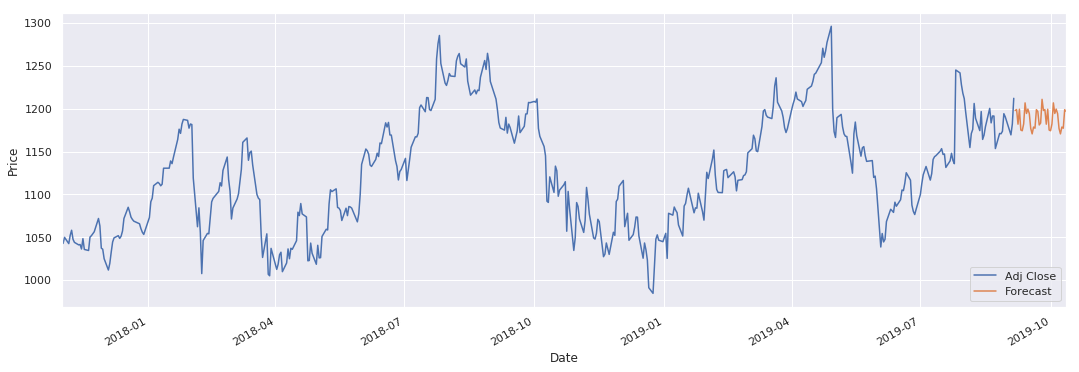

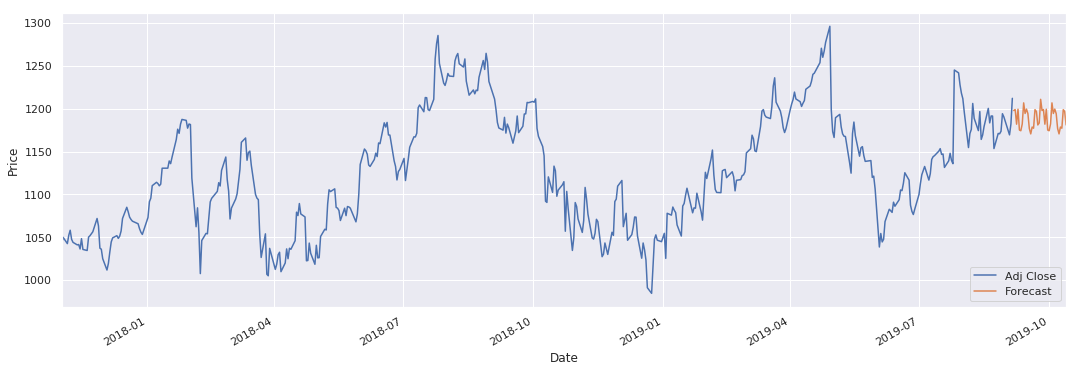

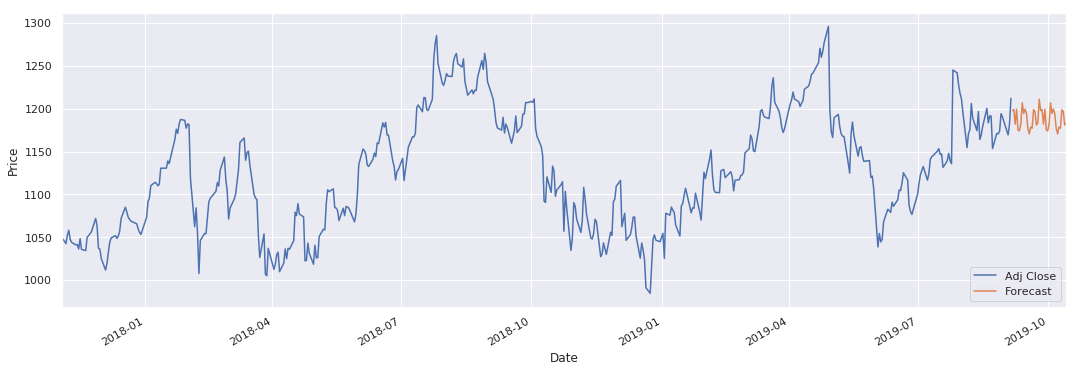

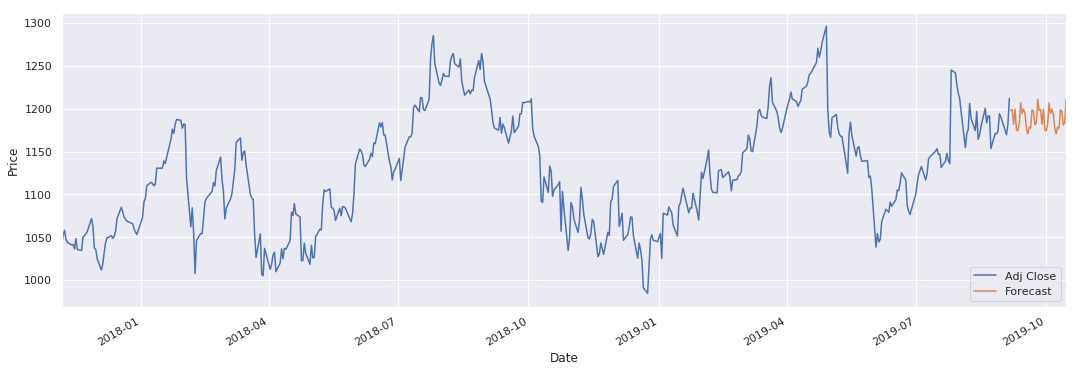

In [103]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)


for i in forecast_set_lr:
  next_date = next_unix
  next_unix += datetime.timedelta(days=1)
  dfreg.loc[next_date] = [np.nan for _ in range (len(dfreg.columns)-1)]+[i]
  
  dfreg['Adj Close'].tail(500).plot(figsize=(18,6))
  dfreg['Forecast'].tail(500).plot()
  plt.legend(loc=4)
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.show()

Quadratic 2
--

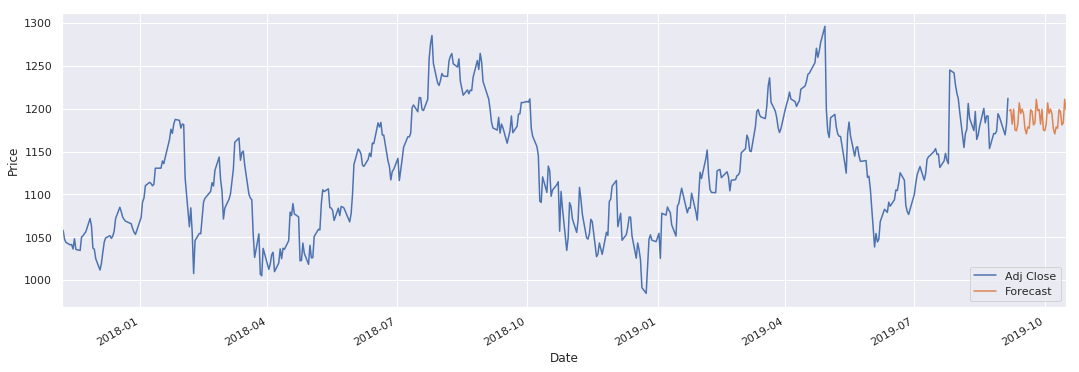

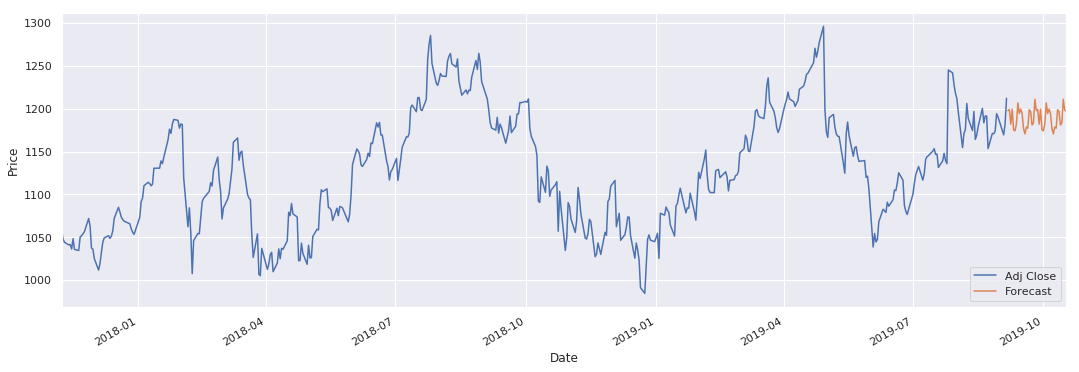

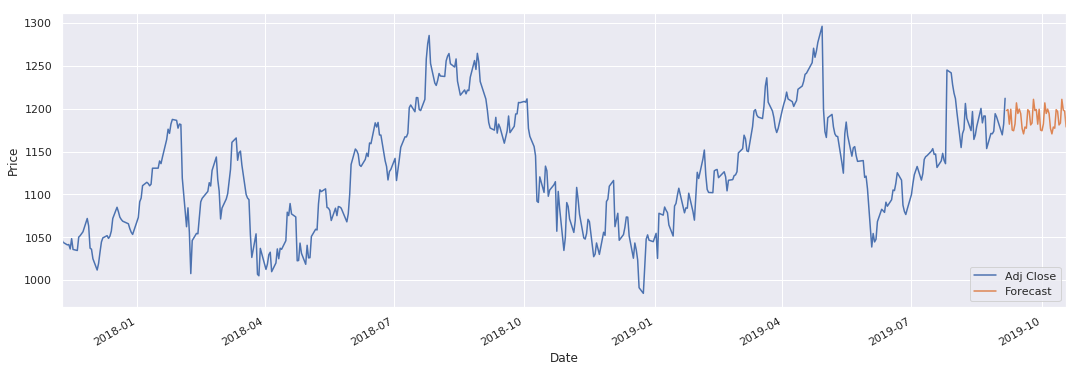

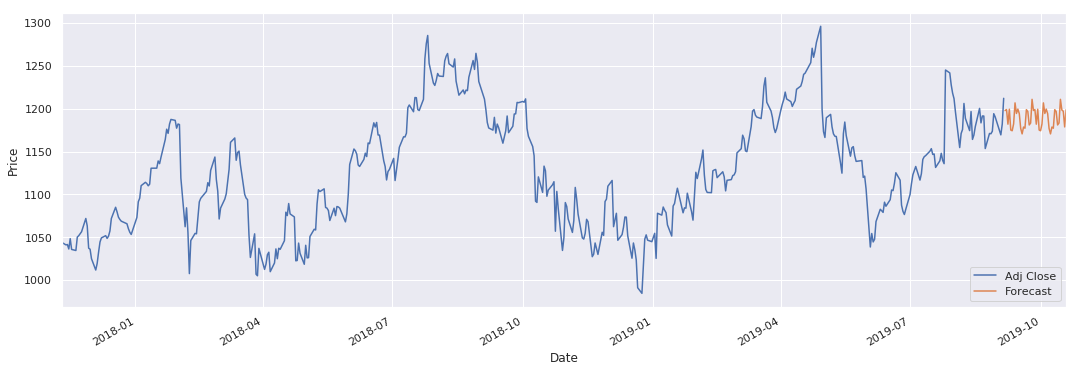

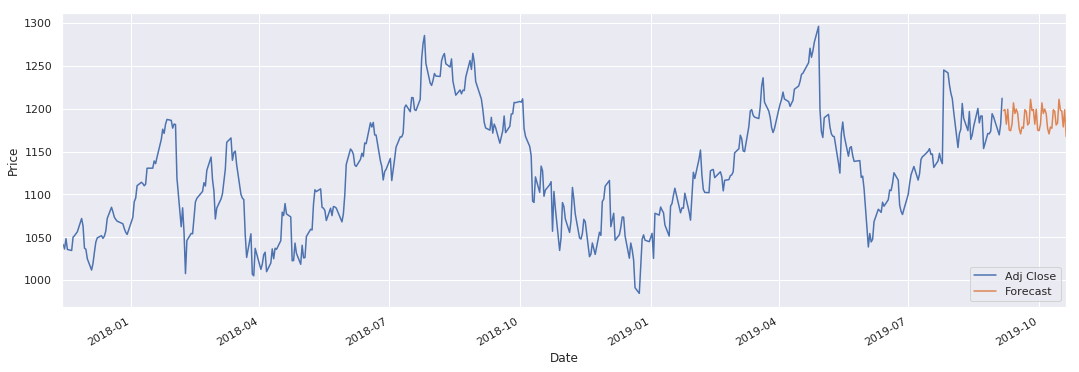

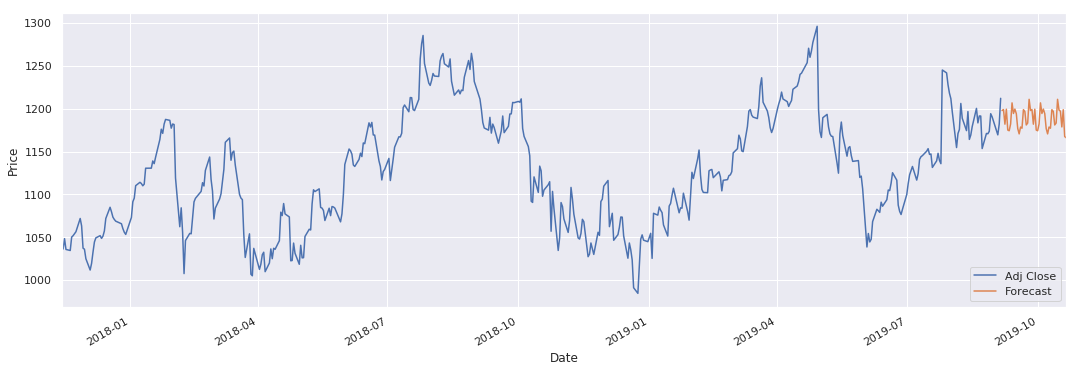

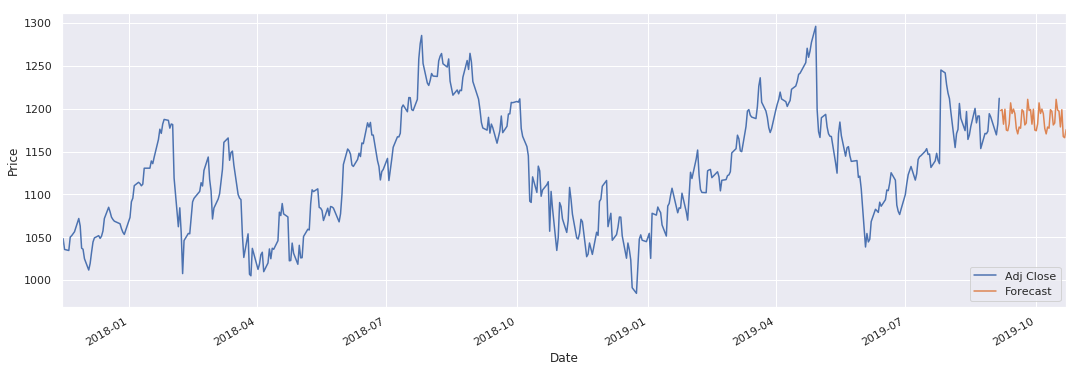

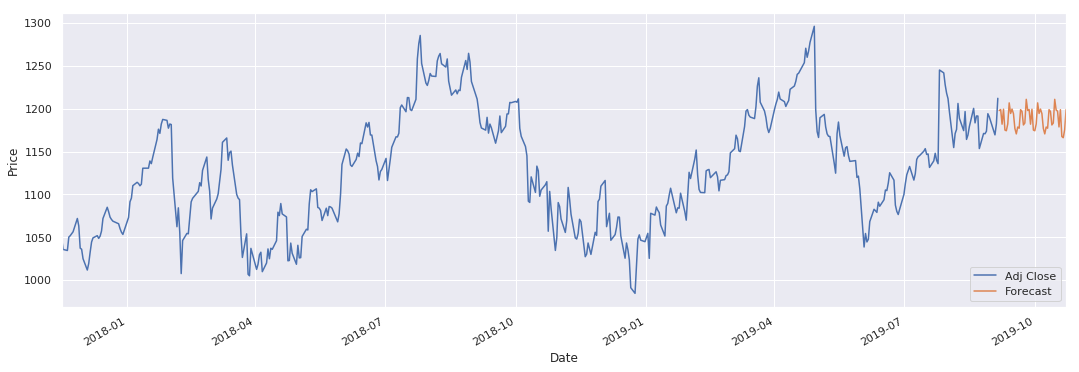

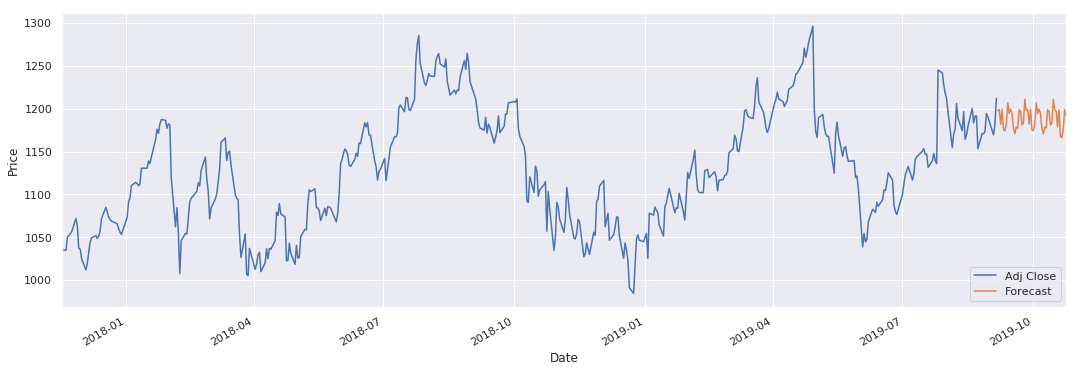

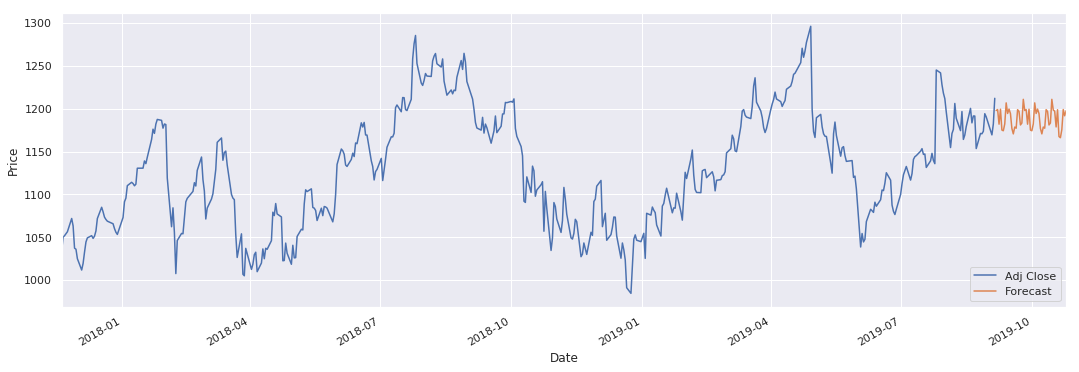

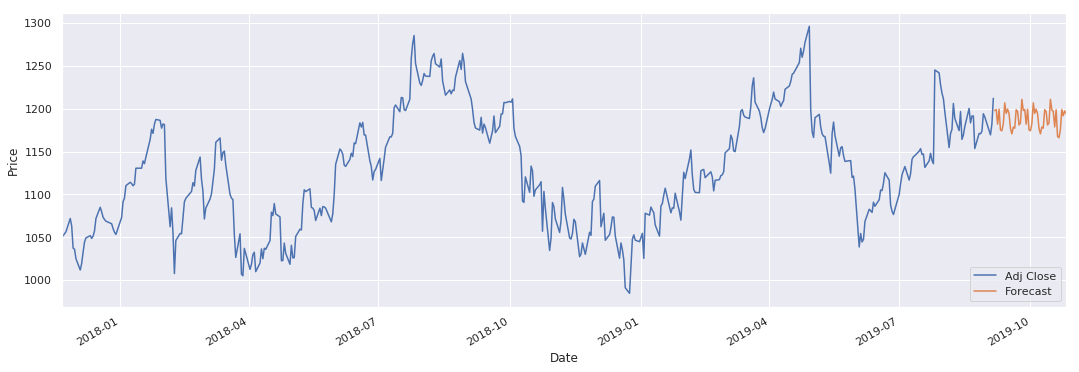

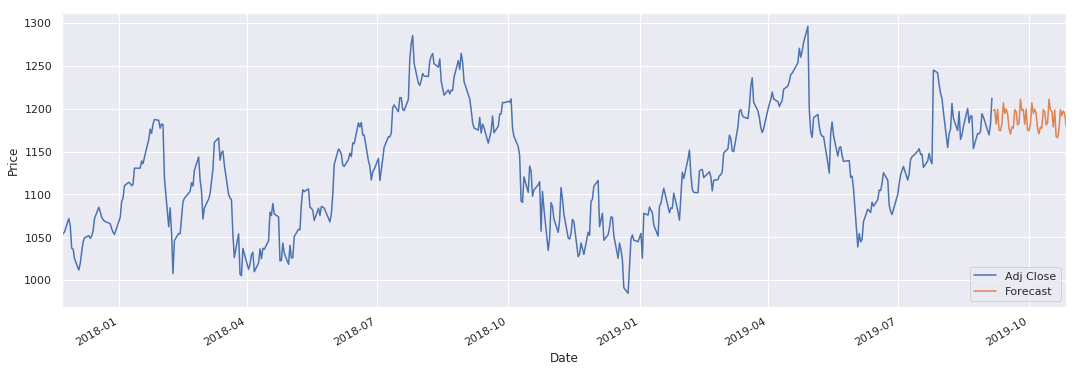

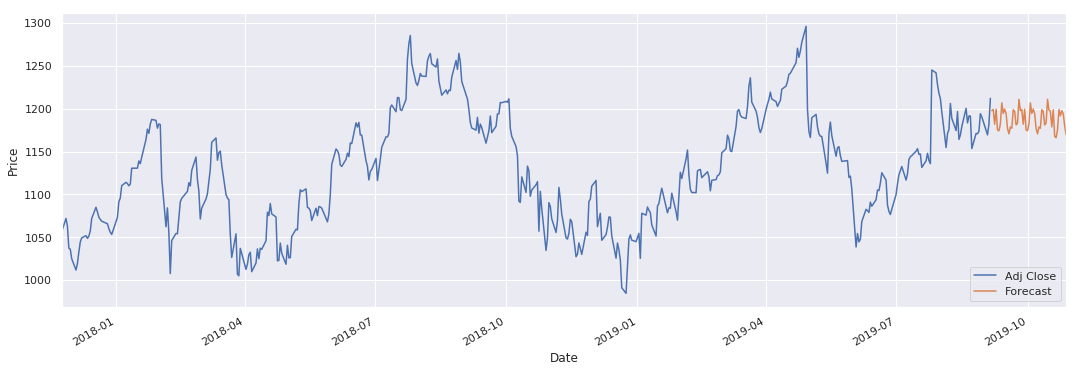

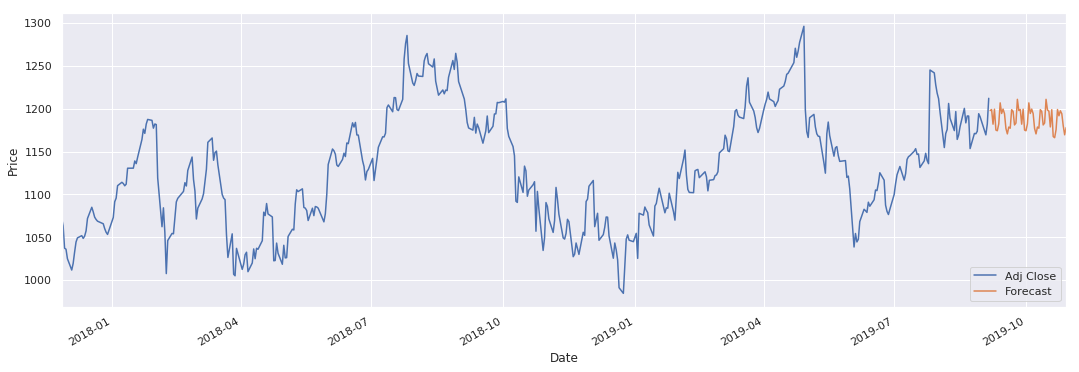

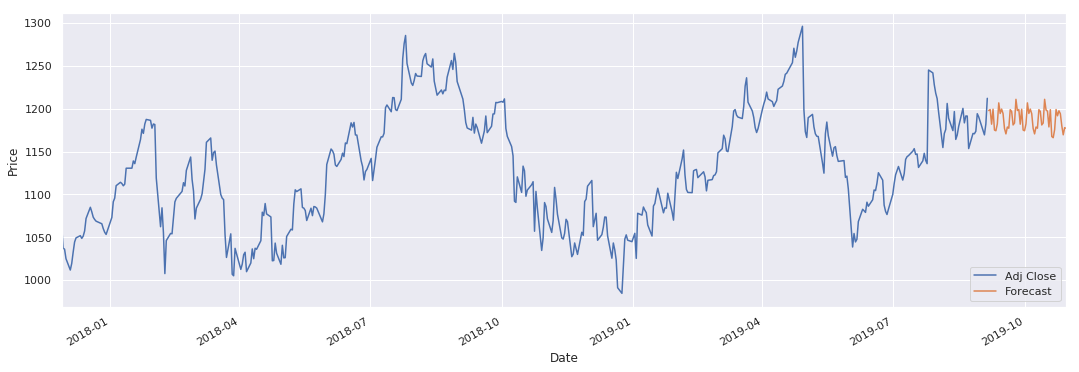

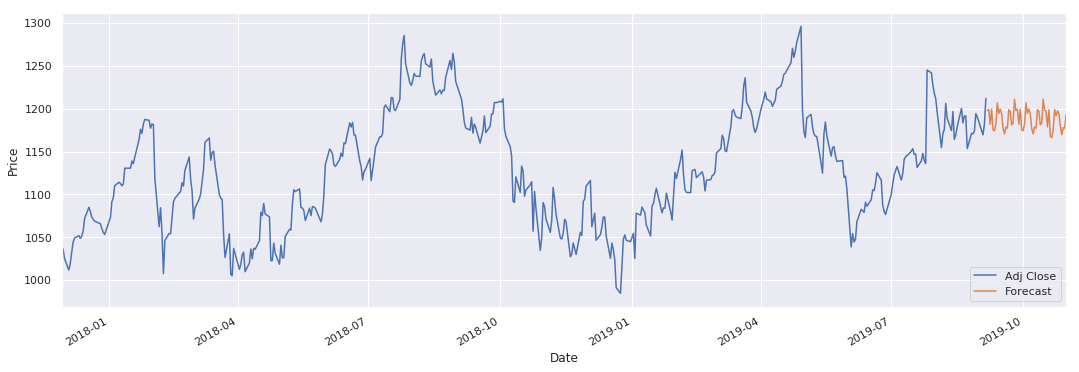

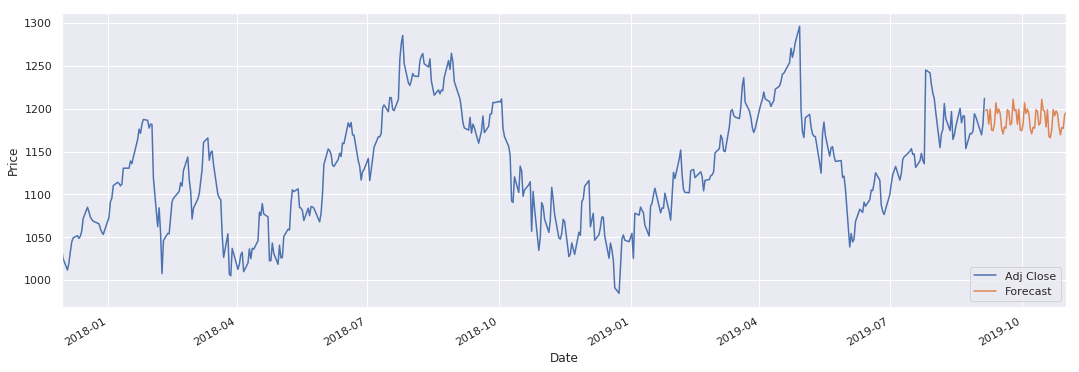

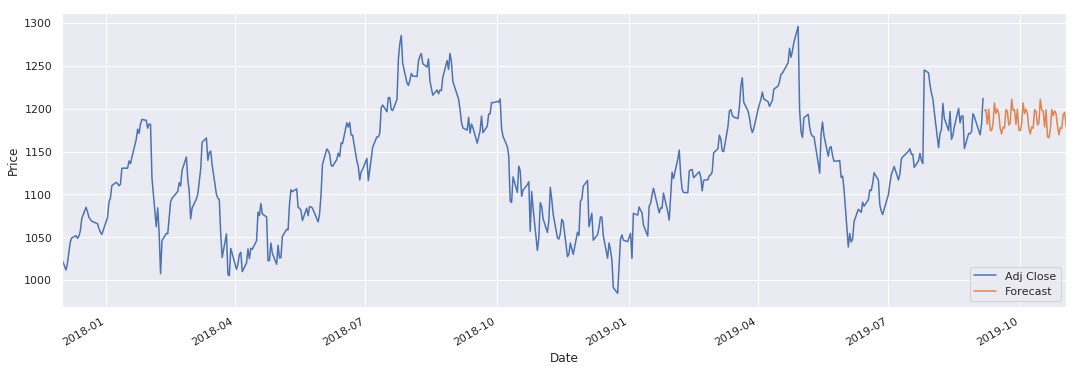

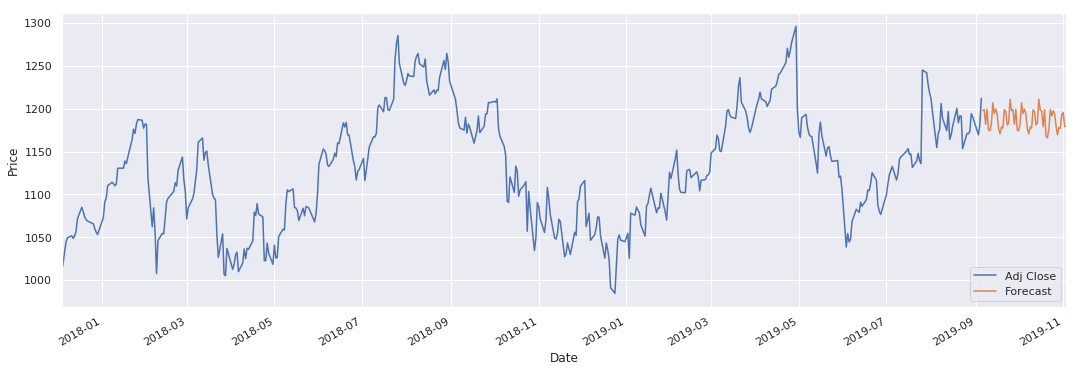

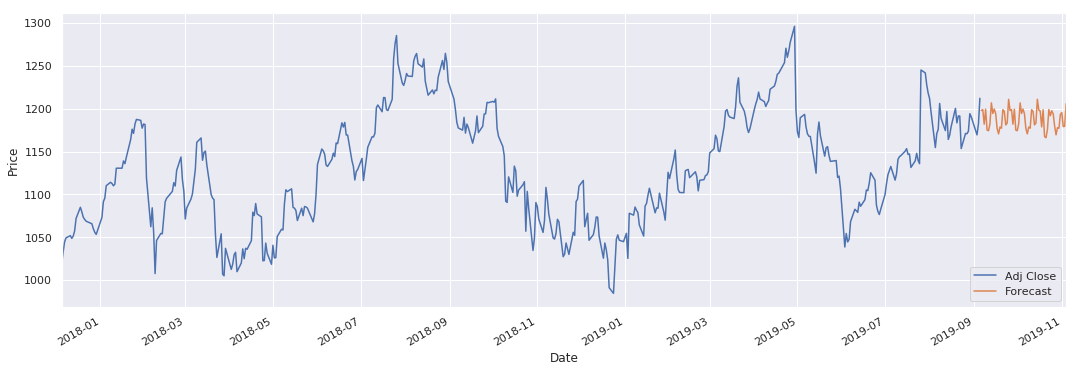

In [104]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)


for i in forecast_set_poly2:
  next_date = next_unix
  next_unix += datetime.timedelta(days=1)
  dfreg.loc[next_date] = [np.nan for _ in range (len(dfreg.columns)-1)]+[i]
  
  dfreg['Adj Close'].tail(500).plot(figsize=(18,6))
  dfreg['Forecast'].tail(500).plot()
  plt.legend(loc=4)
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.show()

Quadratic 3
--

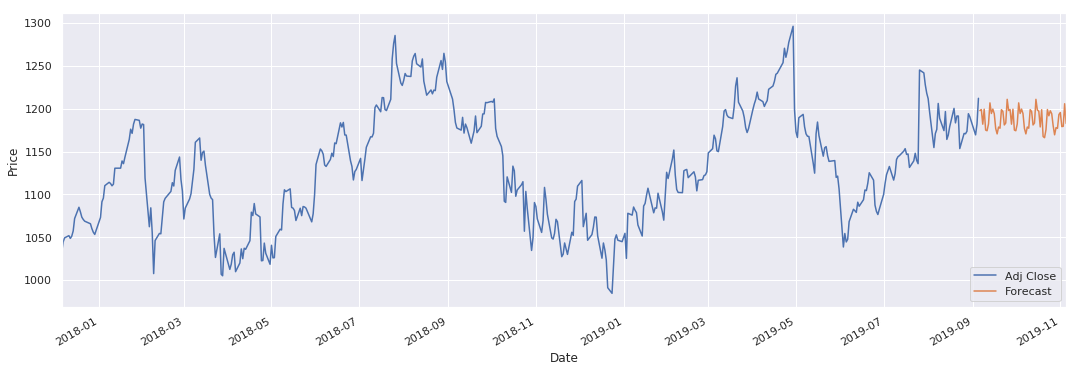

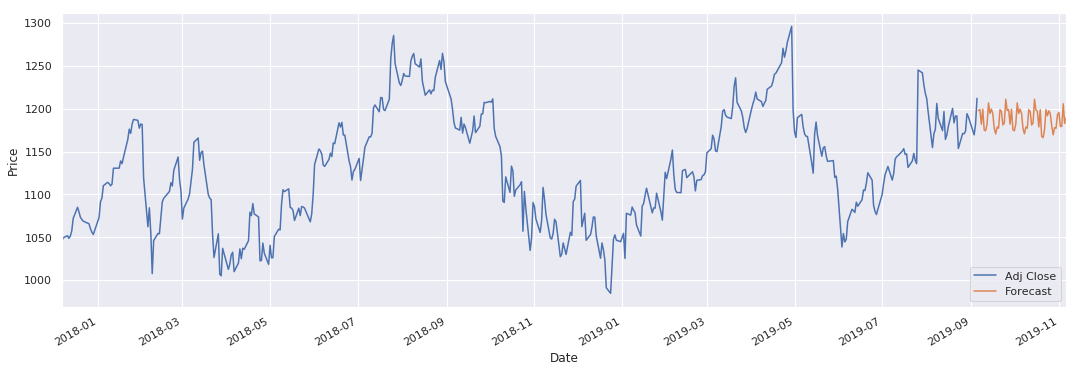

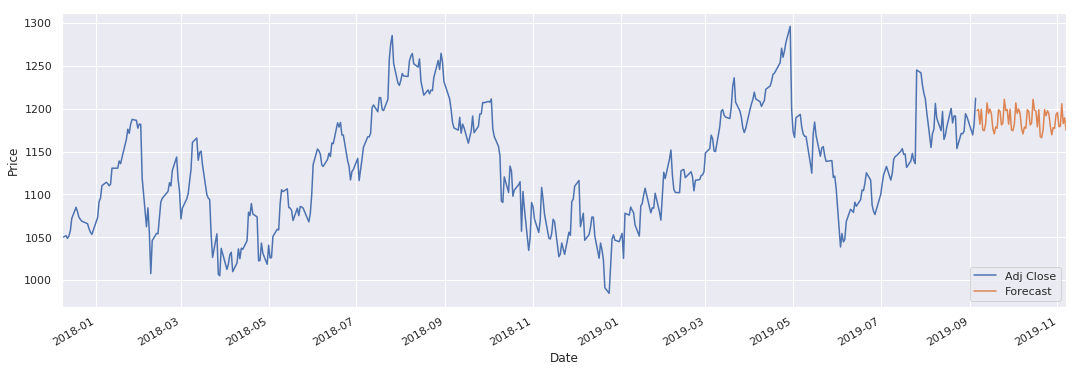

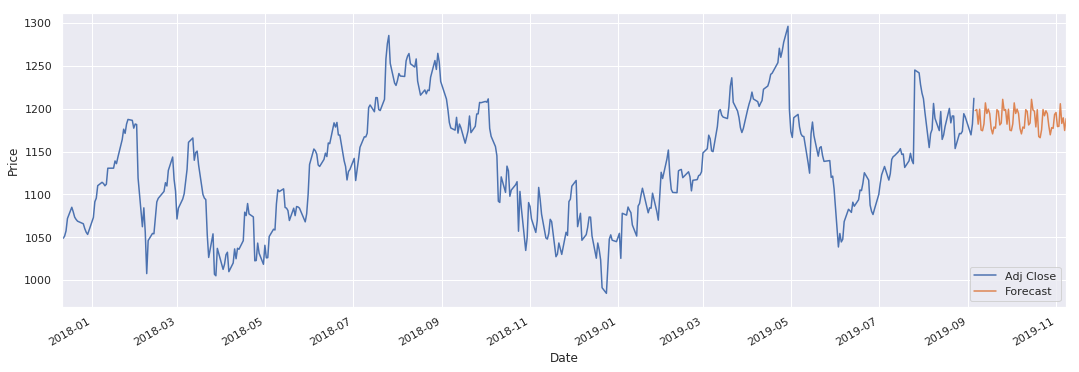

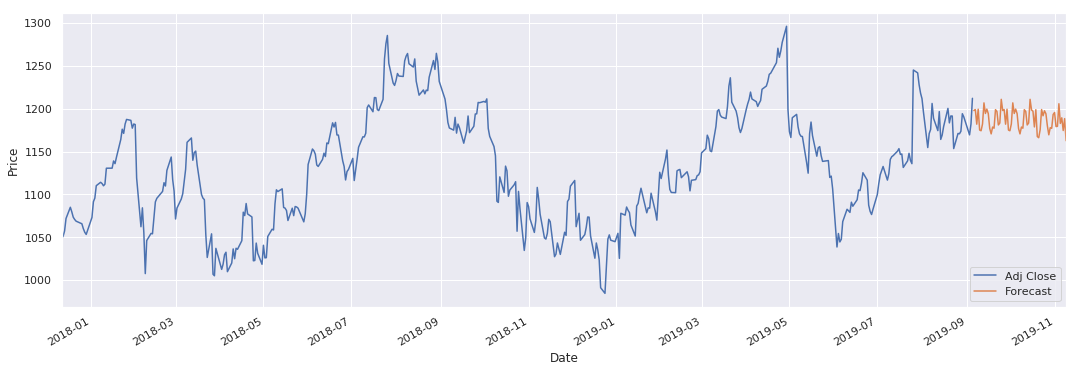

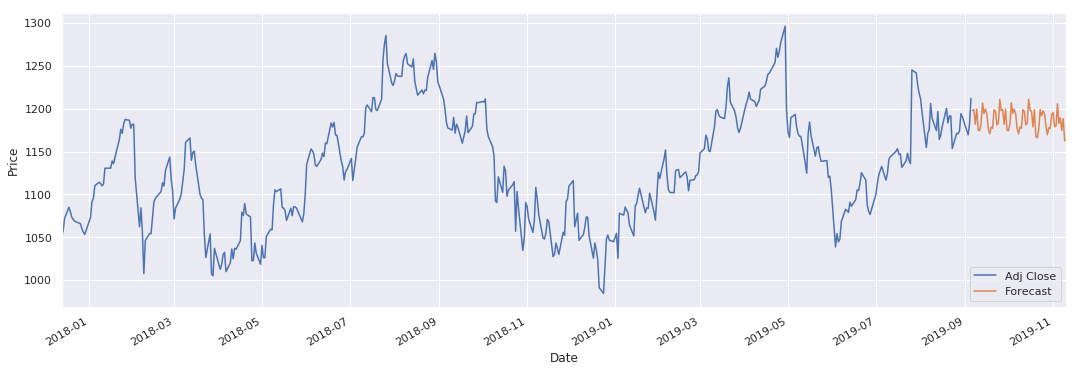

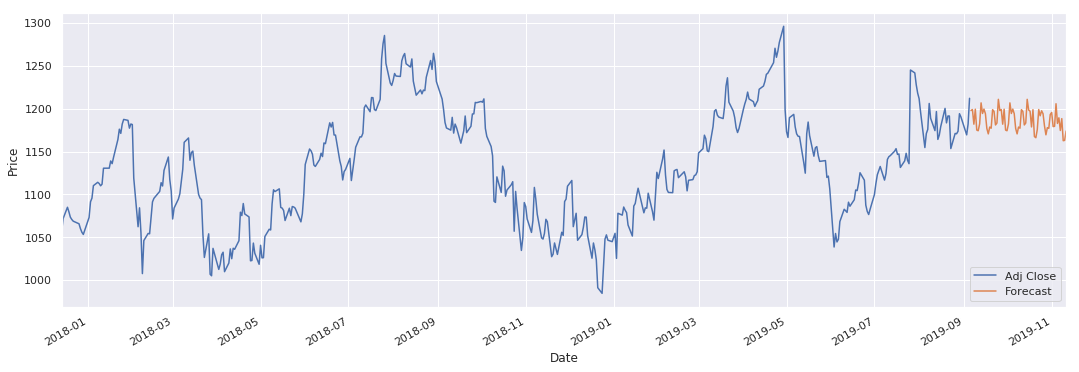

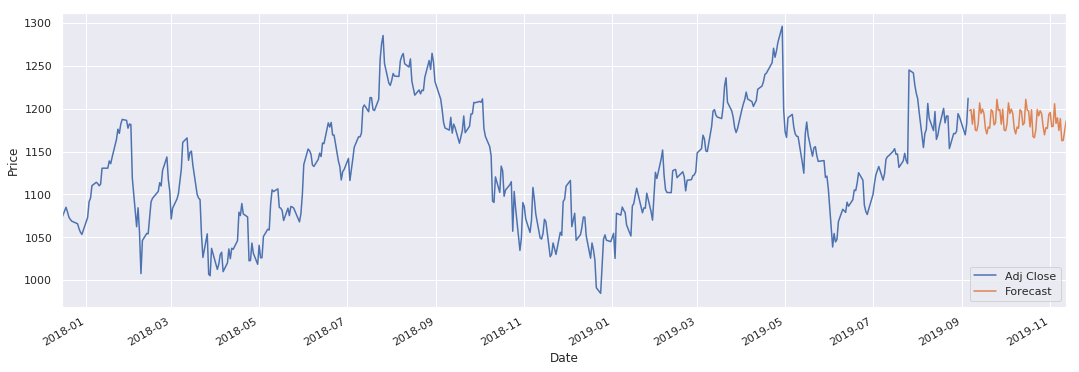

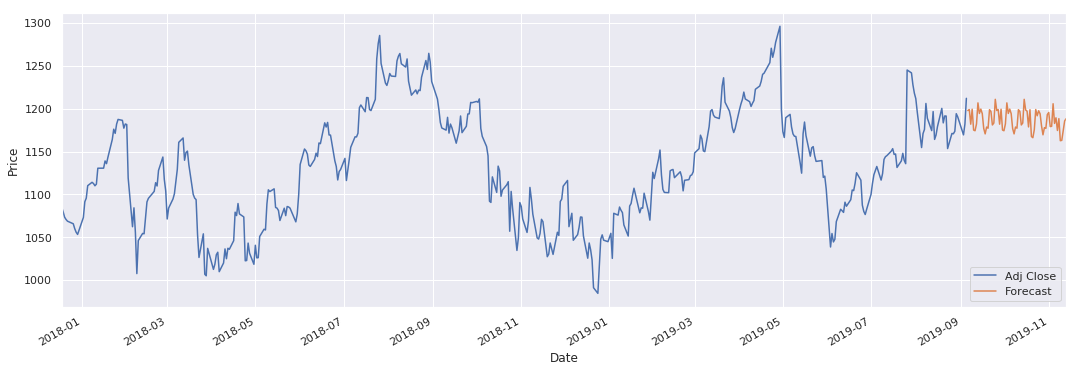

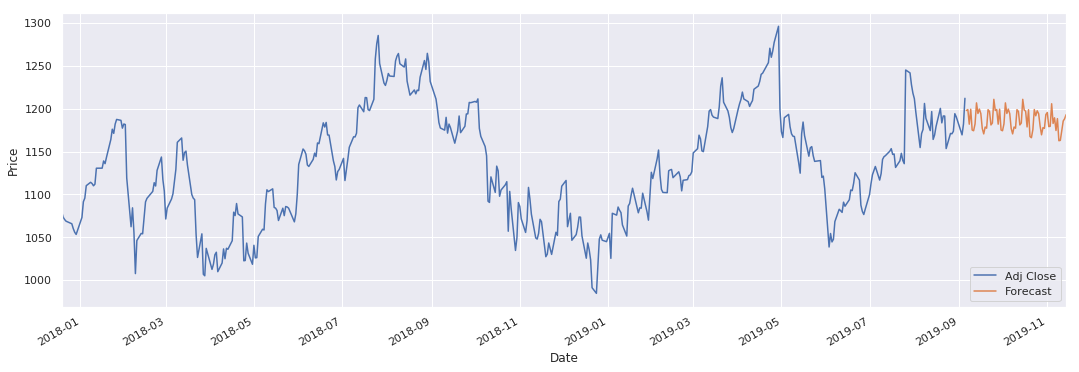

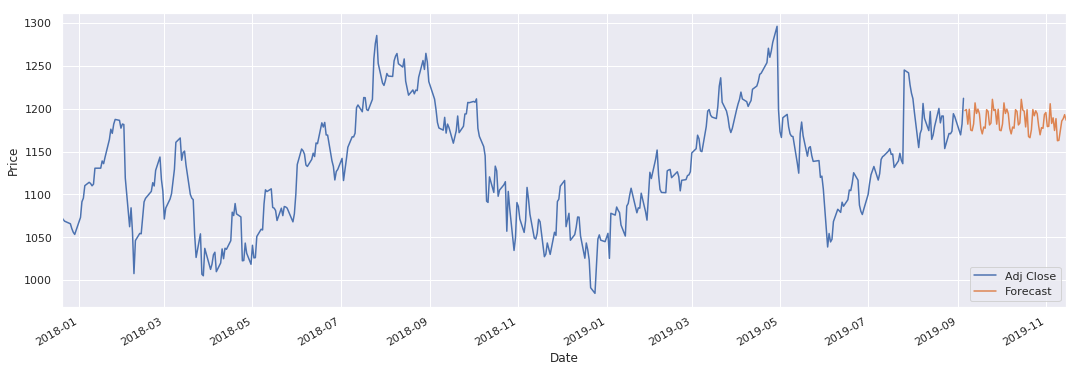

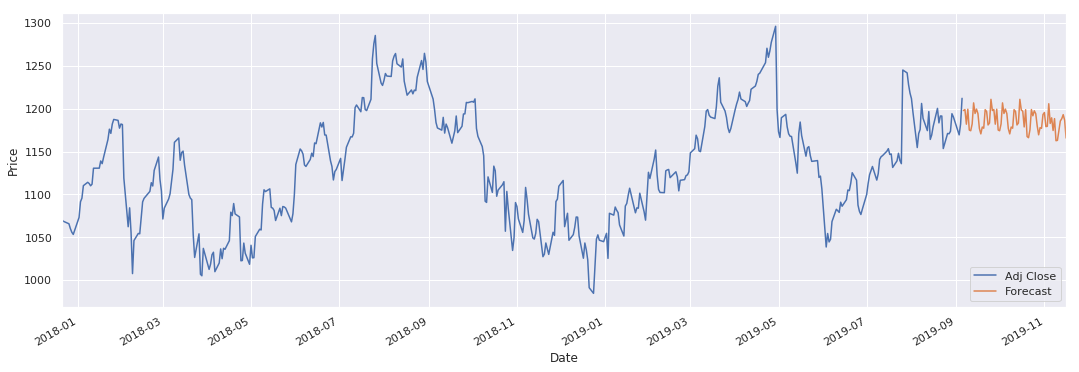

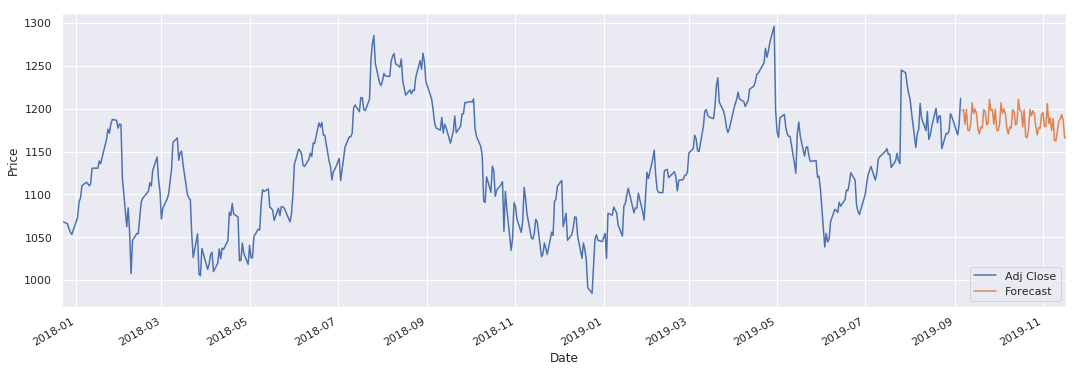

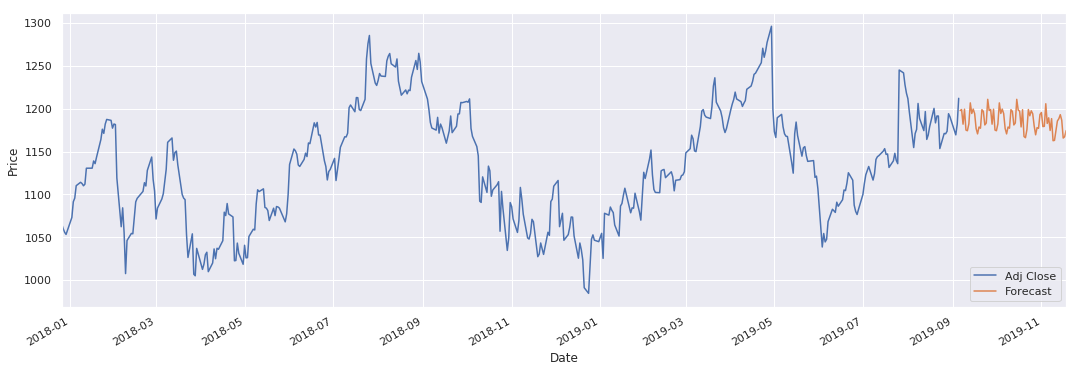

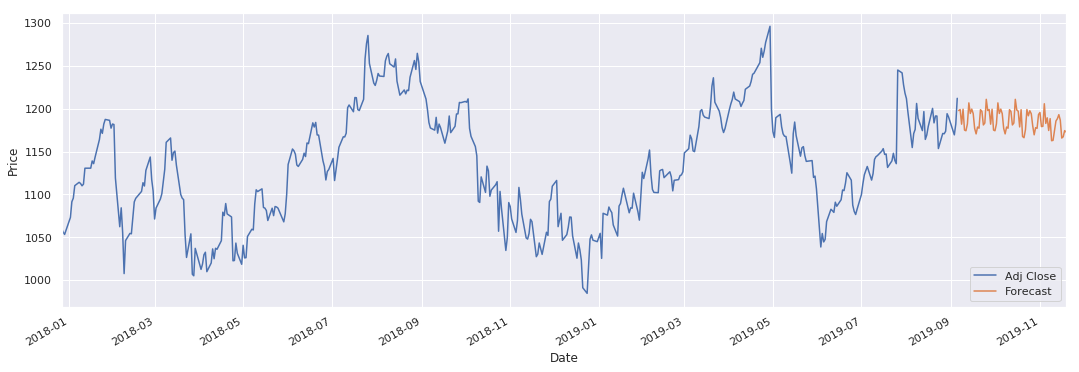

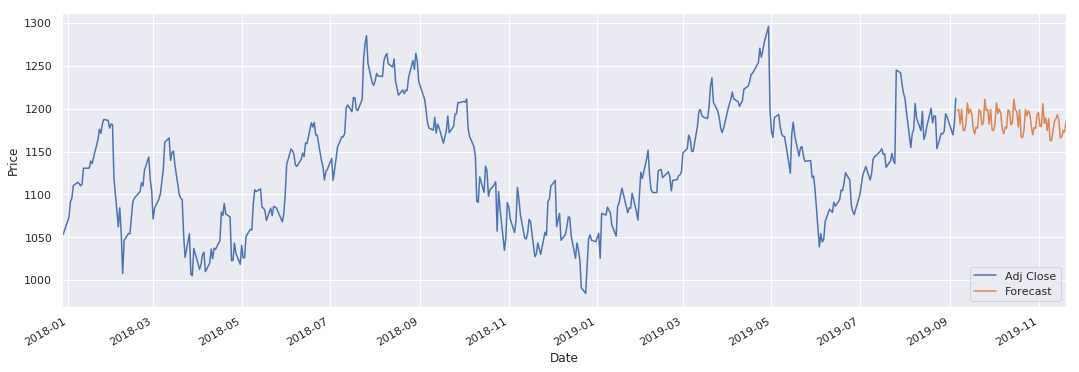

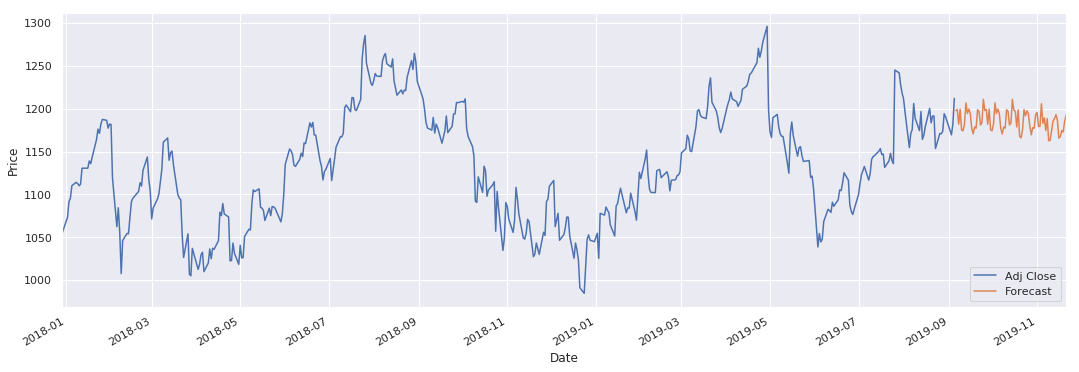

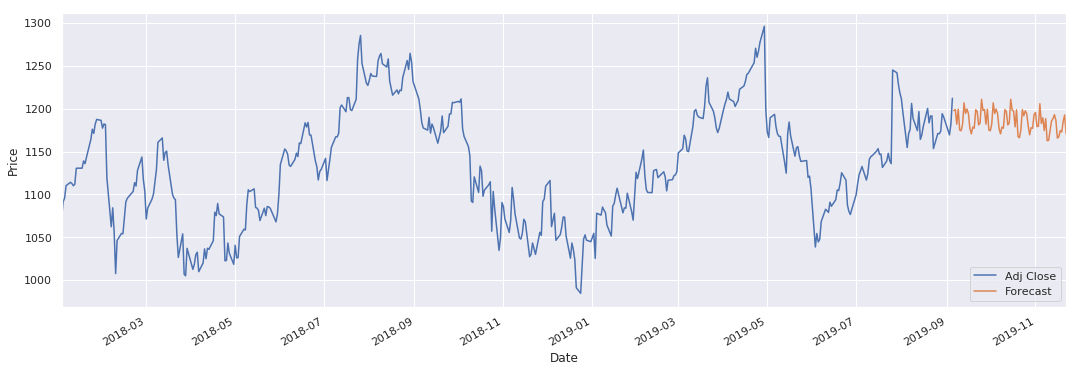

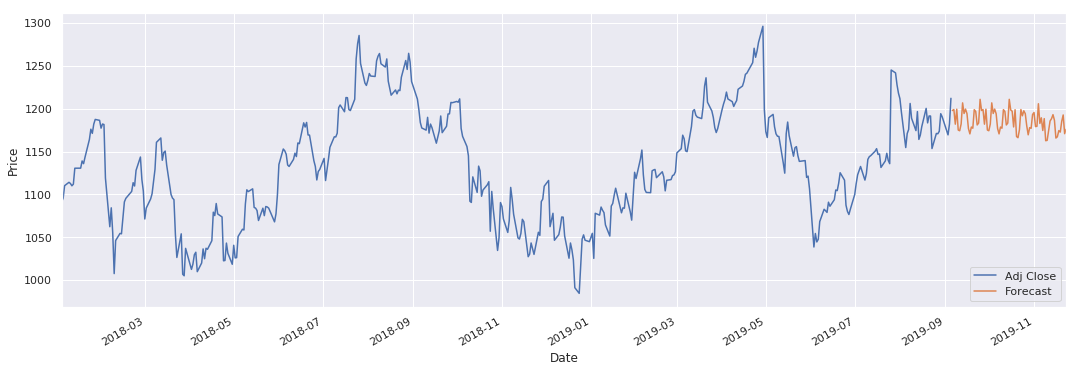

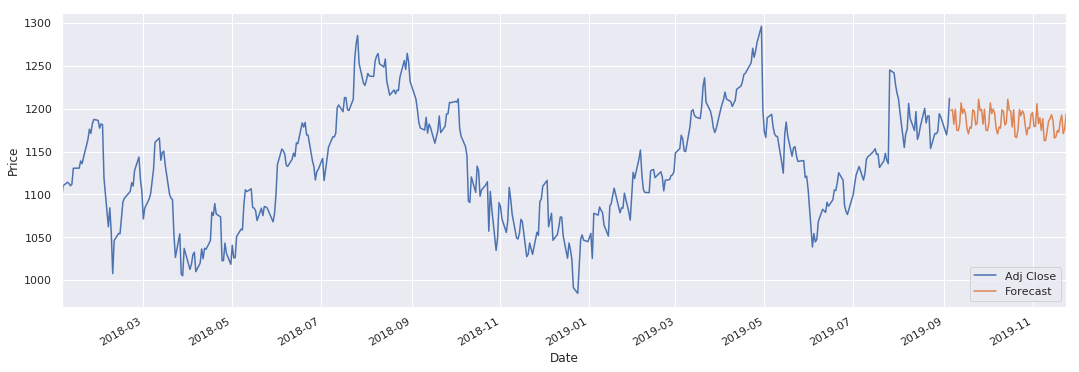

In [105]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)


for i in forecast_set_poly3:
  next_date = next_unix
  next_unix += datetime.timedelta(days=1)
  dfreg.loc[next_date] = [np.nan for _ in range (len(dfreg.columns)-1)]+[i]
  
  dfreg['Adj Close'].tail(500).plot(figsize=(18,6))
  dfreg['Forecast'].tail(500).plot()
  plt.legend(loc=4)
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.show()

KNN
--

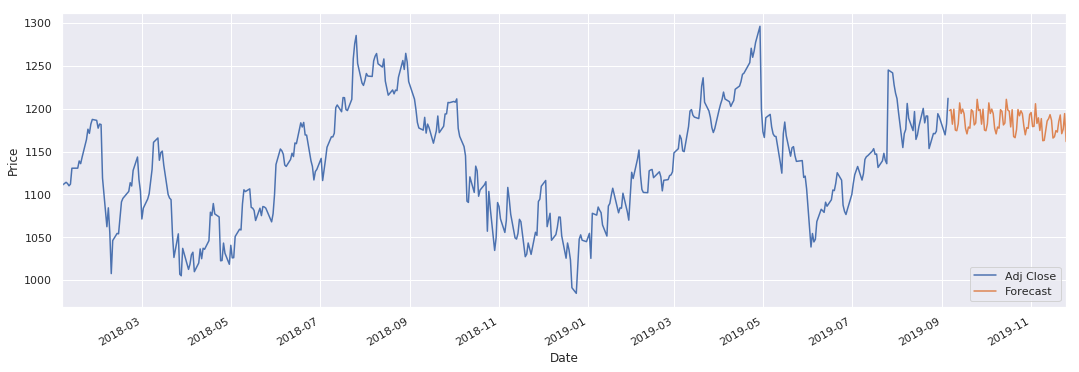

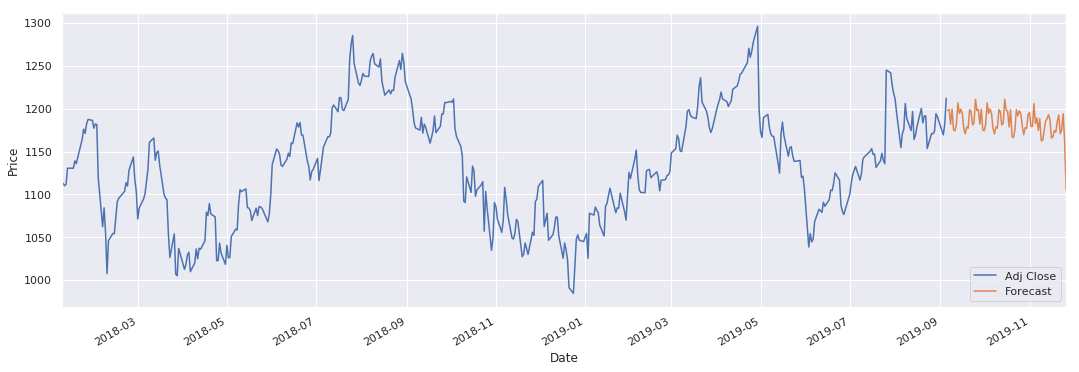

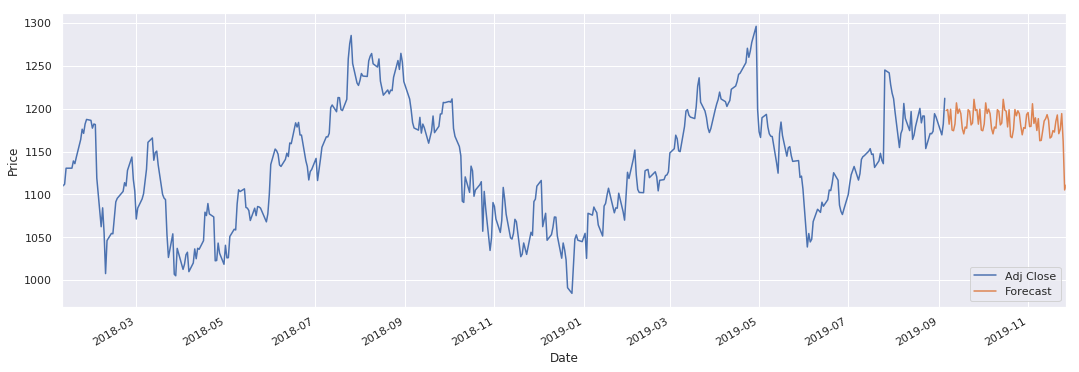

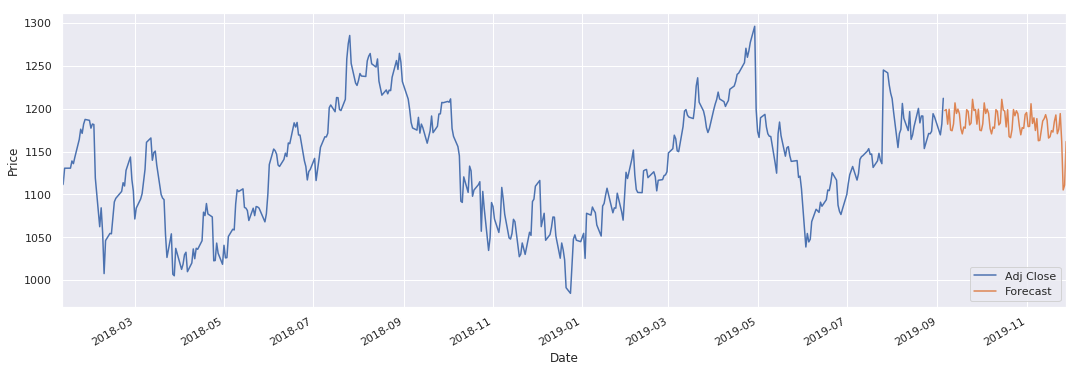

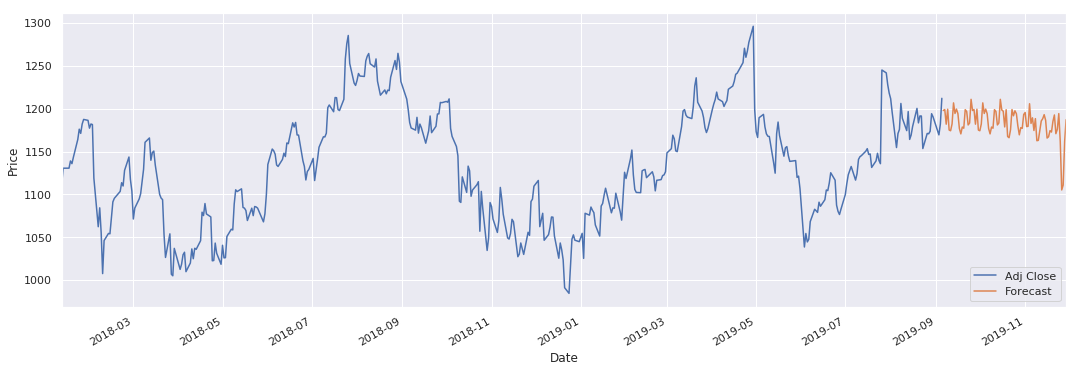

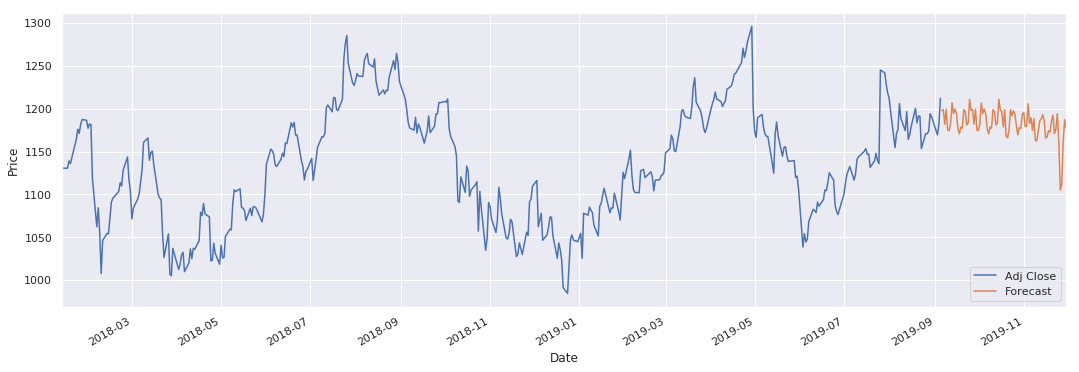

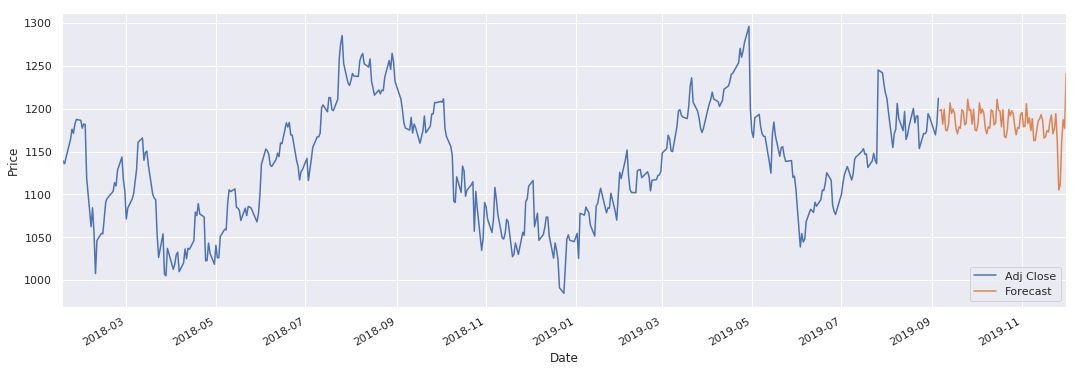

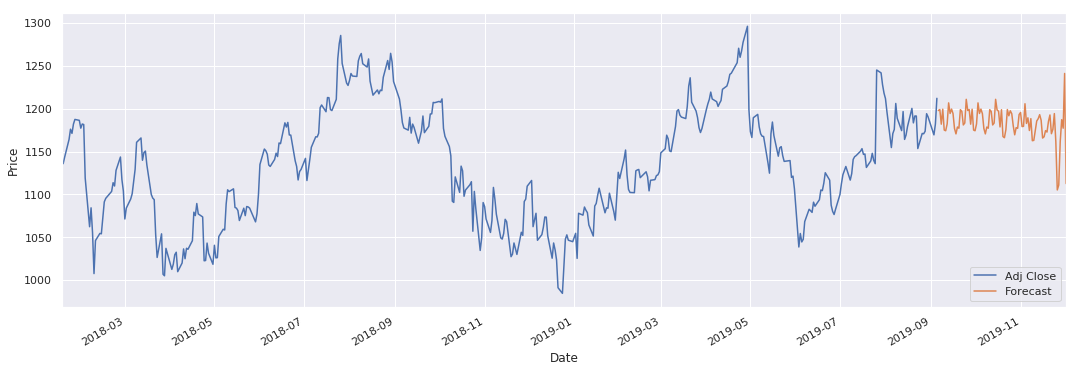

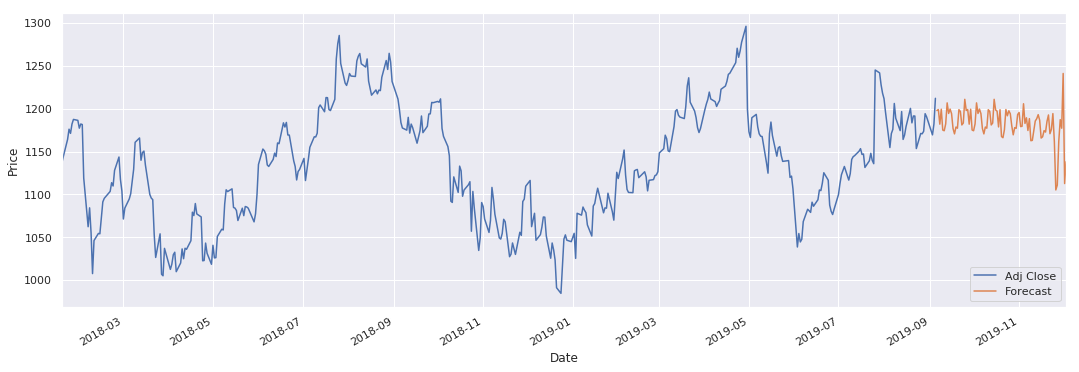

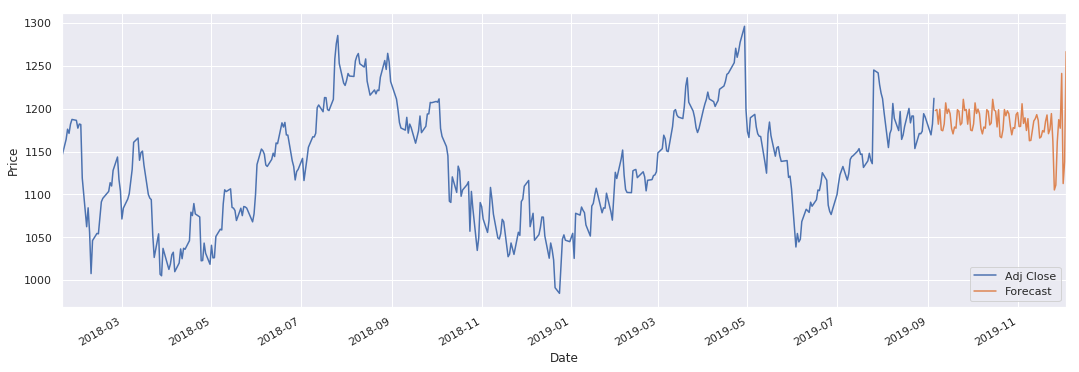

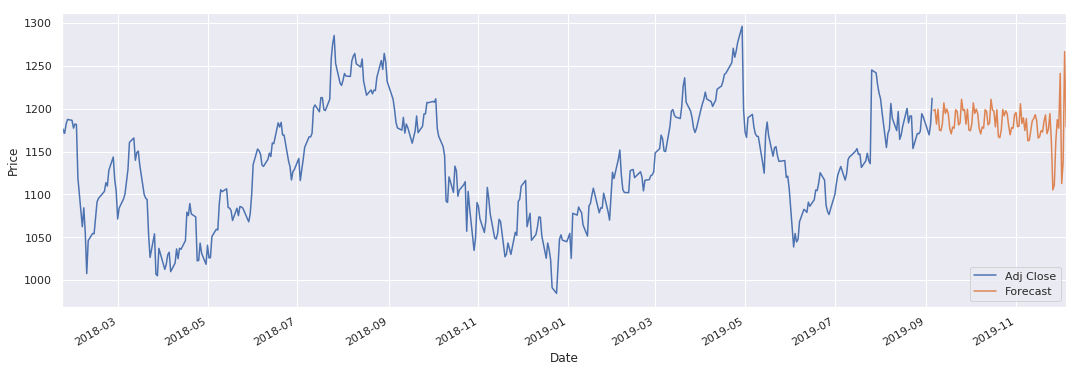

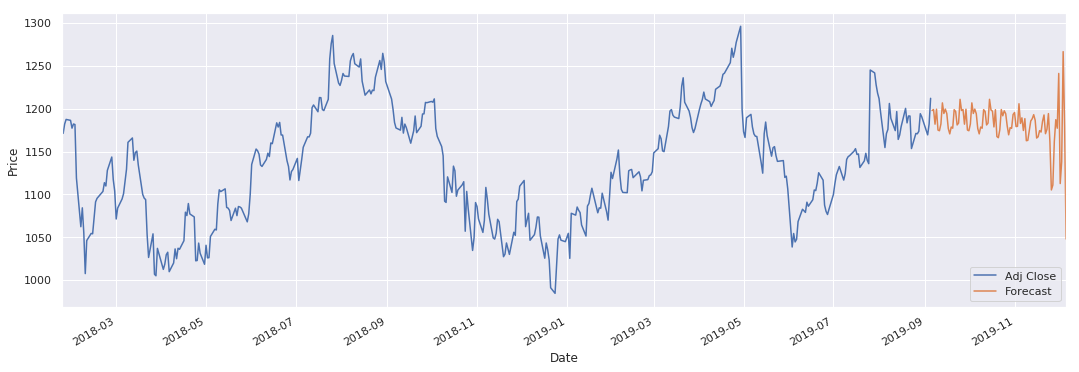

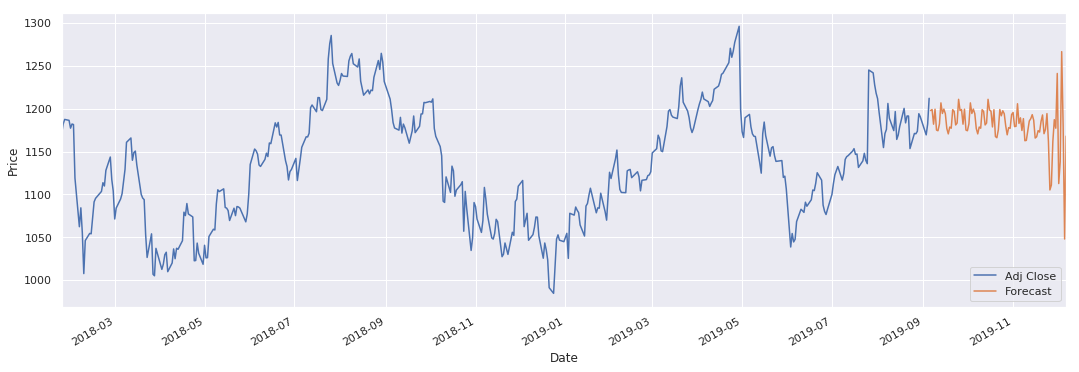

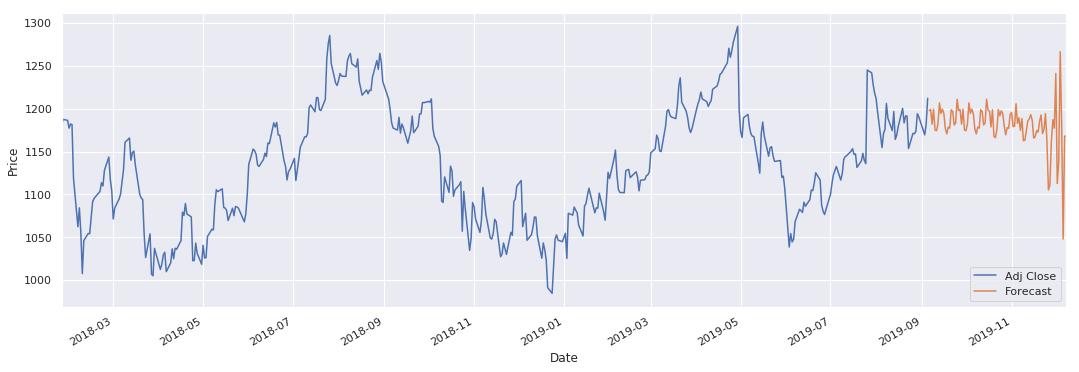

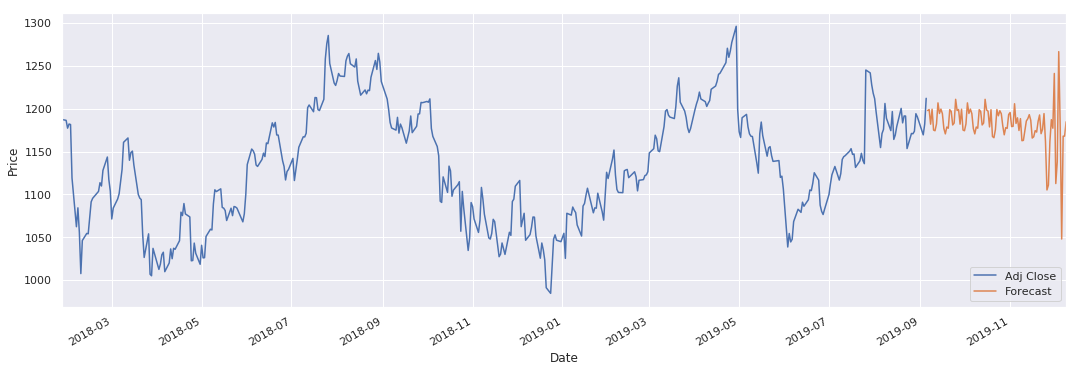

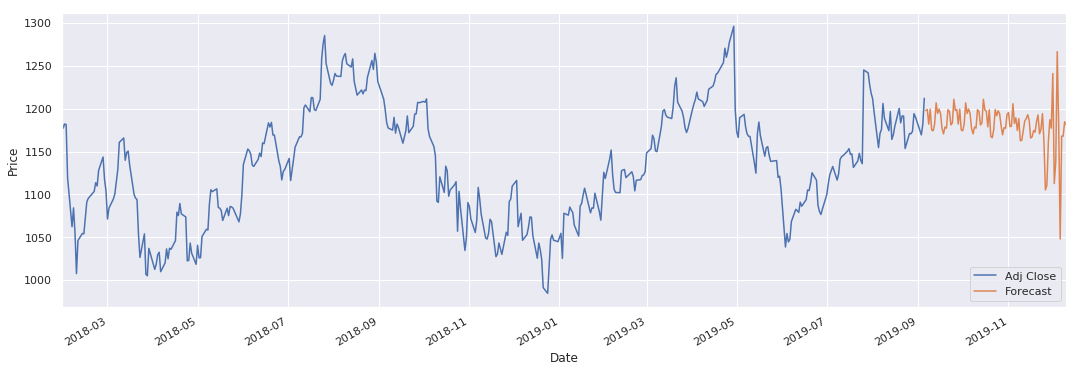

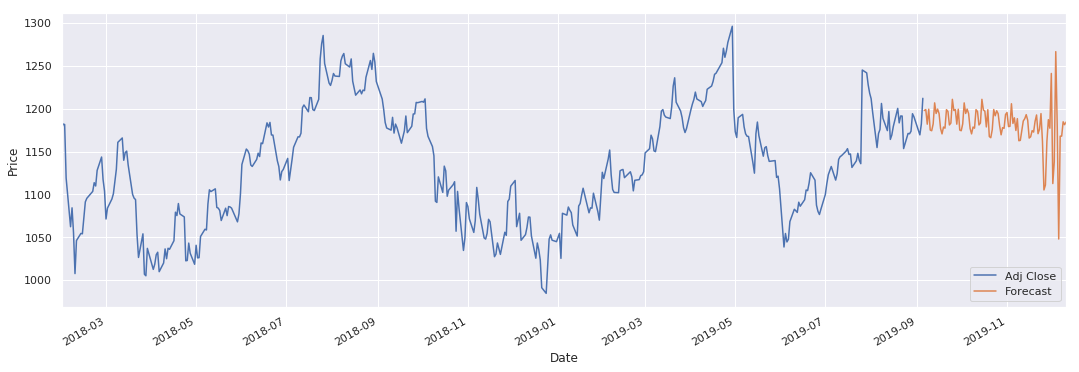

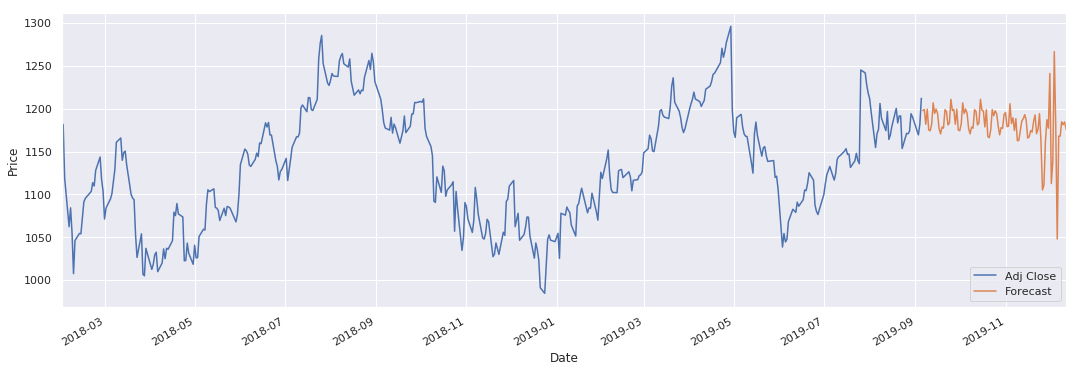

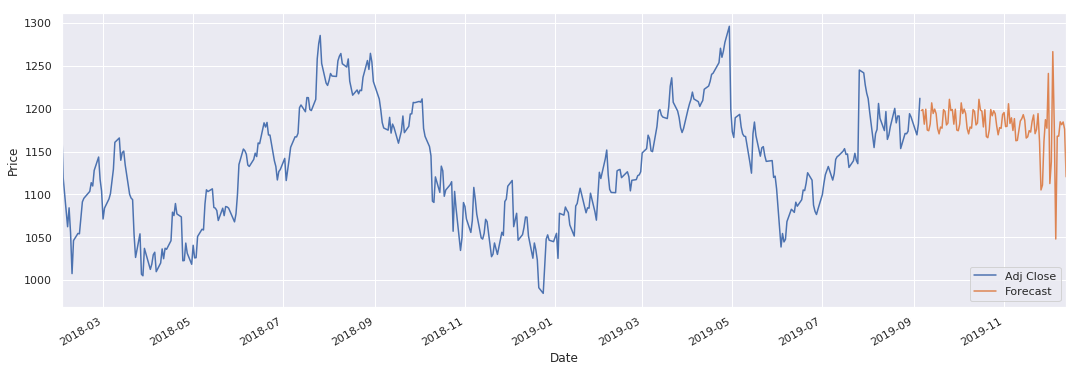

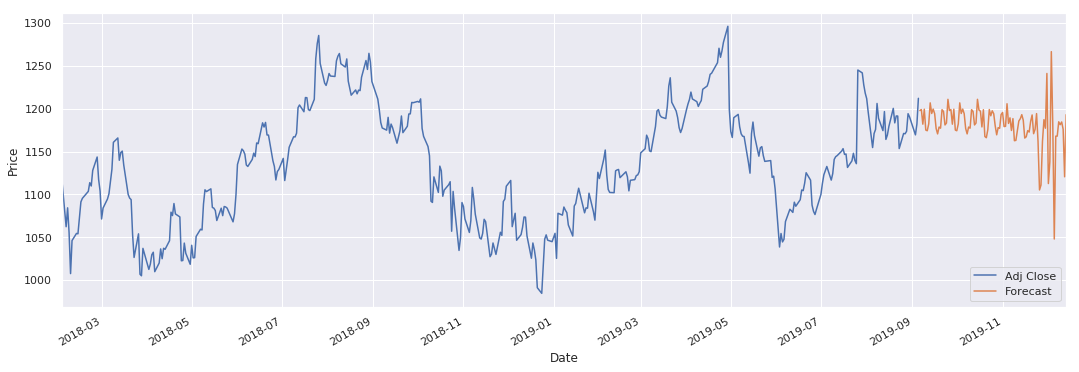

In [106]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)


for i in forecast_set_knn:
  next_date = next_unix
  next_unix += datetime.timedelta(days=1)
  dfreg.loc[next_date] = [np.nan for _ in range (len(dfreg.columns)-1)]+[i]
  
  dfreg['Adj Close'].tail(500).plot(figsize=(18,6))
  dfreg['Forecast'].tail(500).plot()
  plt.legend(loc=4)
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.show()

Ridge Regression
---

1932
1487
1519


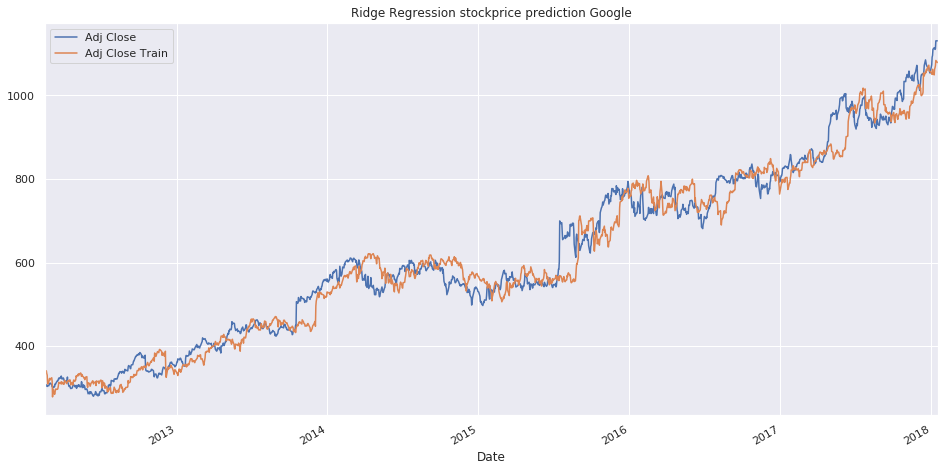

In [136]:
df_ridge = df.copy()
print(len(df))
df_ridge.drop(['Open','High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[window:ind_split]
print(len(df_ridge))
print(len(y_pred_train_ridge[:]))
df_ridge['Adj Close Train'] = y_pred_train_ridge[:-(window)] 
df_ridge.plot(label='Google', figsize = (16,8), title= 'Ridge Regression stockprice prediction Google', grid=True)


1932
392
392


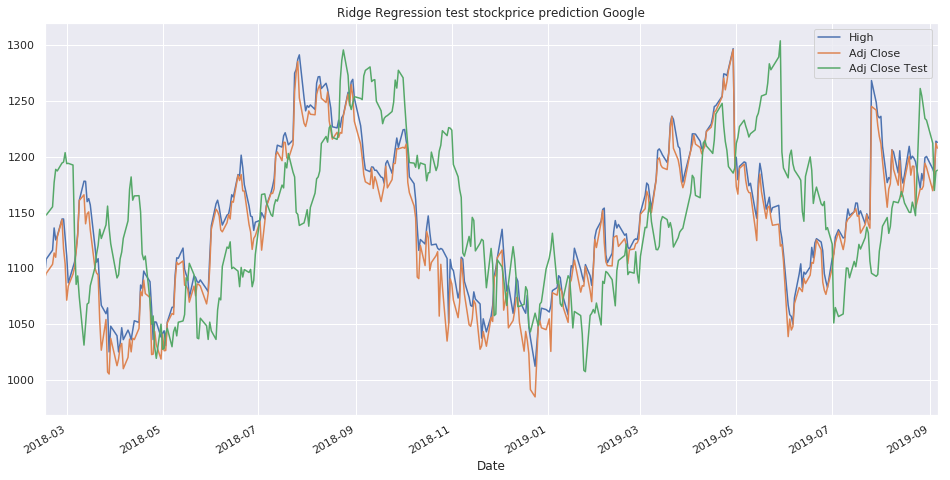

In [146]:
df_ridge = df.copy()
print(len(df_ridge))
df_ridge.drop(['Open', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[ind_split+window-11:] #temporary workaround on the -11 . I have made a mistake in combine two types of code... learned a lot!
print(len(df_ridge))
print(len(y_pred_ridge))
df_ridge['Adj Close Test'] = y_pred_ridge

df_ridge.plot(label='Google', figsize = (16,8), title= 'Ridge Regression test stockprice prediction Google', grid=True)

# Tasks
---
-- create a reenforcement learning agent to predict stockprices

- import dependencies
- import dataset
- plot dataset
- Split dataset for training and testing

- define linear algorithm 
- define quadratic algorithm 
- define lasso algorithm 
- define ridgealgorithm 

- make predictions
- plot predictions
- test prediction



feature engineering
- High Low Percentage
- Percentage Change
